# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis

##### **Project Type**    - Unsupervised ML, Clustering

##### **Contribution**    - Individual
##### **Name** - Ayush Singh


# **Project Summary -**

This project centers on Zomato, one of the foremost online food delivery and restaurant discovery platforms. It leverages two distinct yet interrelated datasets: one that captures comprehensive restaurant metadata (such as name, location, cuisine type, average cost, and ratings), and another that contains rich user-generated reviews, including textual feedback and associated ratings.

The initial phase of the project was devoted to rigorous data cleaning and preprocessing, ensuring data consistency, removing missing or irrelevant entries, converting datatypes, and preparing the textual data for Natural Language Processing (NLP). This foundational step was crucial for enabling accurate analysis and meaningful insights.

Following this, we conducted extensive Exploratory Data Analysis (EDA) on both datasets. EDA helped us understand the distribution of ratings, popular cuisines, user engagement patterns, and trends across different locations. It also allowed us to identify key variables and relationships that would later inform our analytical models.

The core analytical objectives of this project were twofold:

Unsupervised Clustering: Using K-Means clustering, we grouped restaurants based on multiple features such as average rating, cuisine, price range, and popularity. This helped identify distinct categories of restaurants (e.g., budget-friendly fast food spots vs. upscale fine dining venues).
Sentiment Analysis: We applied NLP techniques to evaluate user sentiment from the textual reviews. Using tools such as VADER and TextBlob, we extracted polarity scores and sentiment labels (positive, neutral, negative). Furthermore, to enhance the interpretability of these reviews, we used Latent Dirichlet Allocation (LDA) to uncover latent topics and visualize them through an LDA visualizer. This provided a thematic breakdown of user concerns and highlights.
In addition to unsupervised analysis, we also implemented supervised machine learning models (e.g., Logistic Regression, Random Forest) to predict sentiment based on review text, allowing us to compare the performance and reliability of rule-based vs. model-based sentiment classification.

Overall, this project delivers a comprehensive analysis of Zomato's restaurant and review data, combining data science, machine learning, and NLP techniques to derive actionable insights. The integration of clustering, sentiment extraction, and topic modeling provides a multi-faceted understanding of customer preferences and restaurant groupings—offering valuable implications for stakeholders in the food and hospitality industry.

# **GitHub Link -**

https://github.com/AyushSinghRana15/Zomato-Restaurant-Clustering-and-Sentiment-Analysis.git

# **Problem Statement**


Project Title: Zomato Restaurant Clustering and Sentiment Analysis

Objective:
The objective of this project is to conduct EDA , Clustering and Sentiment Analysis on two datasets related to Zomato, a popular restaurant discovery and food delivery platform. The analysis aims to gain insights into restaurant clustering and user sentiment towards different restaurants listed on Zomato.

Datasets

1. Dataset 1: Zomato Restaurant's name and Metadata Details

  * Link: [Dataset 1](https://drive.google.com/file/d/1493xGT8t66Wr3_cRxY_OvW_KNYNSNFrt/view?usp=sharing)

  * Description: This dataset contains details of various restaurants listed on Zomato. It includes features such as restaurant name, links ,costs, collections, cuisines, timings.

2. Dataset 2: Zomato Restaurant Reviews

  * Link: [Dataset 2](https://drive.google.com/file/d/1YEpeBRL3HwvzkhWzXZt4VB_7eH8Wf2O8/view?usp=sharing)

  * Description: This dataset contains user reviews for different restaurants on Zomato. It includes information such as the text of the review, reviewer, ratings, metadata, time, pictures.

# ***Let's Begin !***

## ***1. Know Your Data***

In [1]:
!pip install pandas
!pip install --user -U nltk
!pip install scikit-learn

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Load Dataset
df_metadata =pd.read_csv("ZomatoRestaurantnamesandMetadata.csv")
df_review =pd.read_csv("ZomatoRestaurantReview.csv")

### Dataset First View

In [4]:
# Dataset First Look
df_metadata.head()


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
df_review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print("Restaurant names and Metadata observations : ",df_metadata.shape)
print("Restaurant reviews : ",df_review.shape)

Restaurant names and Metadata observations :  (105, 6)
Restaurant reviews :  (10000, 7)


### Dataset Information

In [7]:
# Dataset Info
print("Zomato Restaurant names and Metadata information")
df_metadata.info()
print("Zomato Restaurant Rewiews information")
df_review.info()

Zomato Restaurant names and Metadata information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB
Zomato Restaurant Rewiews information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures 

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print("Duplicate Values in Restaurant names and Metadata observations dataset : ",df_metadata.duplicated().sum())
print("Duplicate Values in Restaurant reviews dataset : ",df_review.duplicated().sum())

Duplicate Values in Restaurant names and Metadata observations dataset :  0
Duplicate Values in Restaurant reviews dataset :  36


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(df_metadata.isnull().sum())
print()
print(df_review.isnull().sum())

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


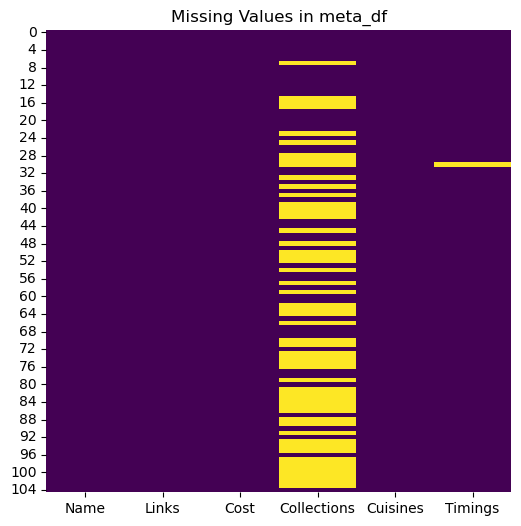

In [10]:
# Visualizing the missing values
# Visualize missing values in the df_metadata dataset
plt.figure(figsize=(6, 6))
sns.heatmap(df_metadata.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in meta_df')
plt.show()


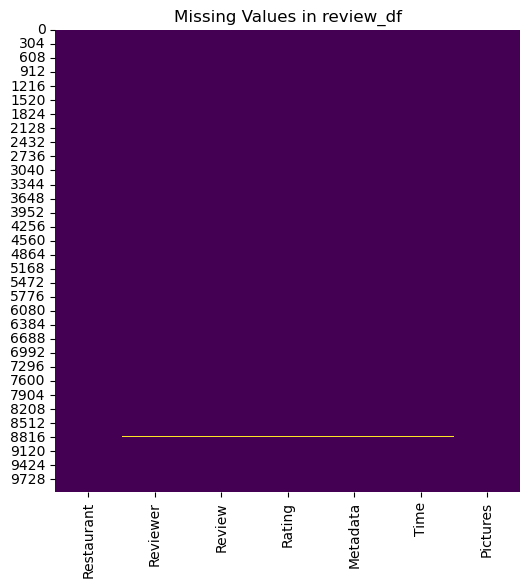

In [11]:
# Visualize missing values in the df_review dataset
plt.figure(figsize=(6, 6))
sns.heatmap(df_review.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in review_df')
plt.show()

### What did you know about your dataset?

Restaurant DataSet(df_metadata):-

*   It contains 105 rows and 6 features.
*   Collection and Timing features has null values.
*   Collections have majority of null values.
*   No duplicated Values.
*   Feature cost and timmings are of object datatype. 

Review Dataset(df_review):-
*   It contains 10000 rows and 7 features.
*   All features have null values except picture and restaurant
*   36 duplicated rows.
*   Rating and Time are of object datatype.


## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
print(df_metadata.columns)
print(df_review.columns)

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')
Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [13]:
# Dataset Describe
df_metadata.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [14]:
df_review.describe(include="all")

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description

#### **Restaurant Dataset:**
Name - Name or unique ID of the restaurant\
Links - URL Links of Restaurants\
Cost - Per person estimated Cost of dining\
Collection - Tagging of Restaurants w.r.t. Zomato categories\
Cuisines - Cuisines served by Restaurants\
Timings - Restaurant Timings
#### **Review Dataset:**
Restaurant - Name or unique ID of the restaurant\
Reviewer - User who posted the review\
Review - The text part of the review\
Rating - Numerical Rating from 1 to 5 according to the reviewers\
Metadata - Review and how many followers they have\
Time- The time in which the review is poste\
Picture - Photos uploaded with the reviews

In [15]:
# Check Unique Values for each variable.
print("Meta dataset:\n",df_metadata.nunique())
print()
print("Review dataset:\n",df_review.nunique())

Meta dataset:
 Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

Review dataset:
 Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
df_metadata['Cost'] = df_metadata['Cost'].str.replace(',','').astype('int64')

In [17]:
# removing null values
df_review = df_review.dropna()

In [18]:
#converting rating to float
df_review.drop(df_review[(df_review['Rating']=='Like')].index,inplace=True)
df_review['Rating']= df_review['Rating'].astype('float64')
df_review.shape

(9954, 7)

In [19]:
# Extracting details from metadata
df_review['Reviewer_Total_Review']=df_review['Metadata'].str.split(',').str[0]
df_review['Reviewer_Followers']=df_review['Metadata'].str.split(',').str[1]
df_review['Reviewer_Total_Review']=pd.to_numeric(df_review['Reviewer_Total_Review'].str.split(' ').str[0])
df_review['Reviewer_Followers']=pd.to_numeric(df_review['Reviewer_Followers'].str.split(' ').str[1])

In [20]:
df_review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3,2.0


In [21]:
df_review.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0,53,54.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,2,53.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,65,423.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0,13,144.0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6,472,1302.0


In [22]:
#Extracting review time,year,month and Hour for analysis
df_review['Time']=pd.to_datetime(df_review['Time'])
df_review['Review_Year'] = pd.DatetimeIndex(df_review['Time']).year
df_review['Review_Month'] = pd.DatetimeIndex(df_review['Time']).month
df_review['Review_Hour'] = pd.DatetimeIndex(df_review['Time']).hour

### What all manipulations have you done and insights you found?

Restaurant Data:

✅ Converted the cost feature from object to integer to ensure consistency across the dataset and enable accurate numeric computations during analysis.

Review Data:

🧹 Handled Missing Values:
Since the number of missing entries was minimal, I opted to drop those rows to maintain the dataset’s integrity without introducing potential noise through imputation.\
🔢 Transformed the rating column:
Converted the rating feature from object to float to allow for precise mathematical operations, such as averaging and correlation analysis.\
📦 Metadata Enrichment:
Extracted meaningful attributes like followers and review count from the embedded metadata field. These features were essential for understanding reviewer influence and credibility.\
⏱️ Temporal Feature Extraction:
Derived Time, Year, Month, and Hour from the review timestamps. These features provide valuable insights into temporal trends in user engagement and restaurant popularity (e.g., time-of-day or seasonal activity patterns).\

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

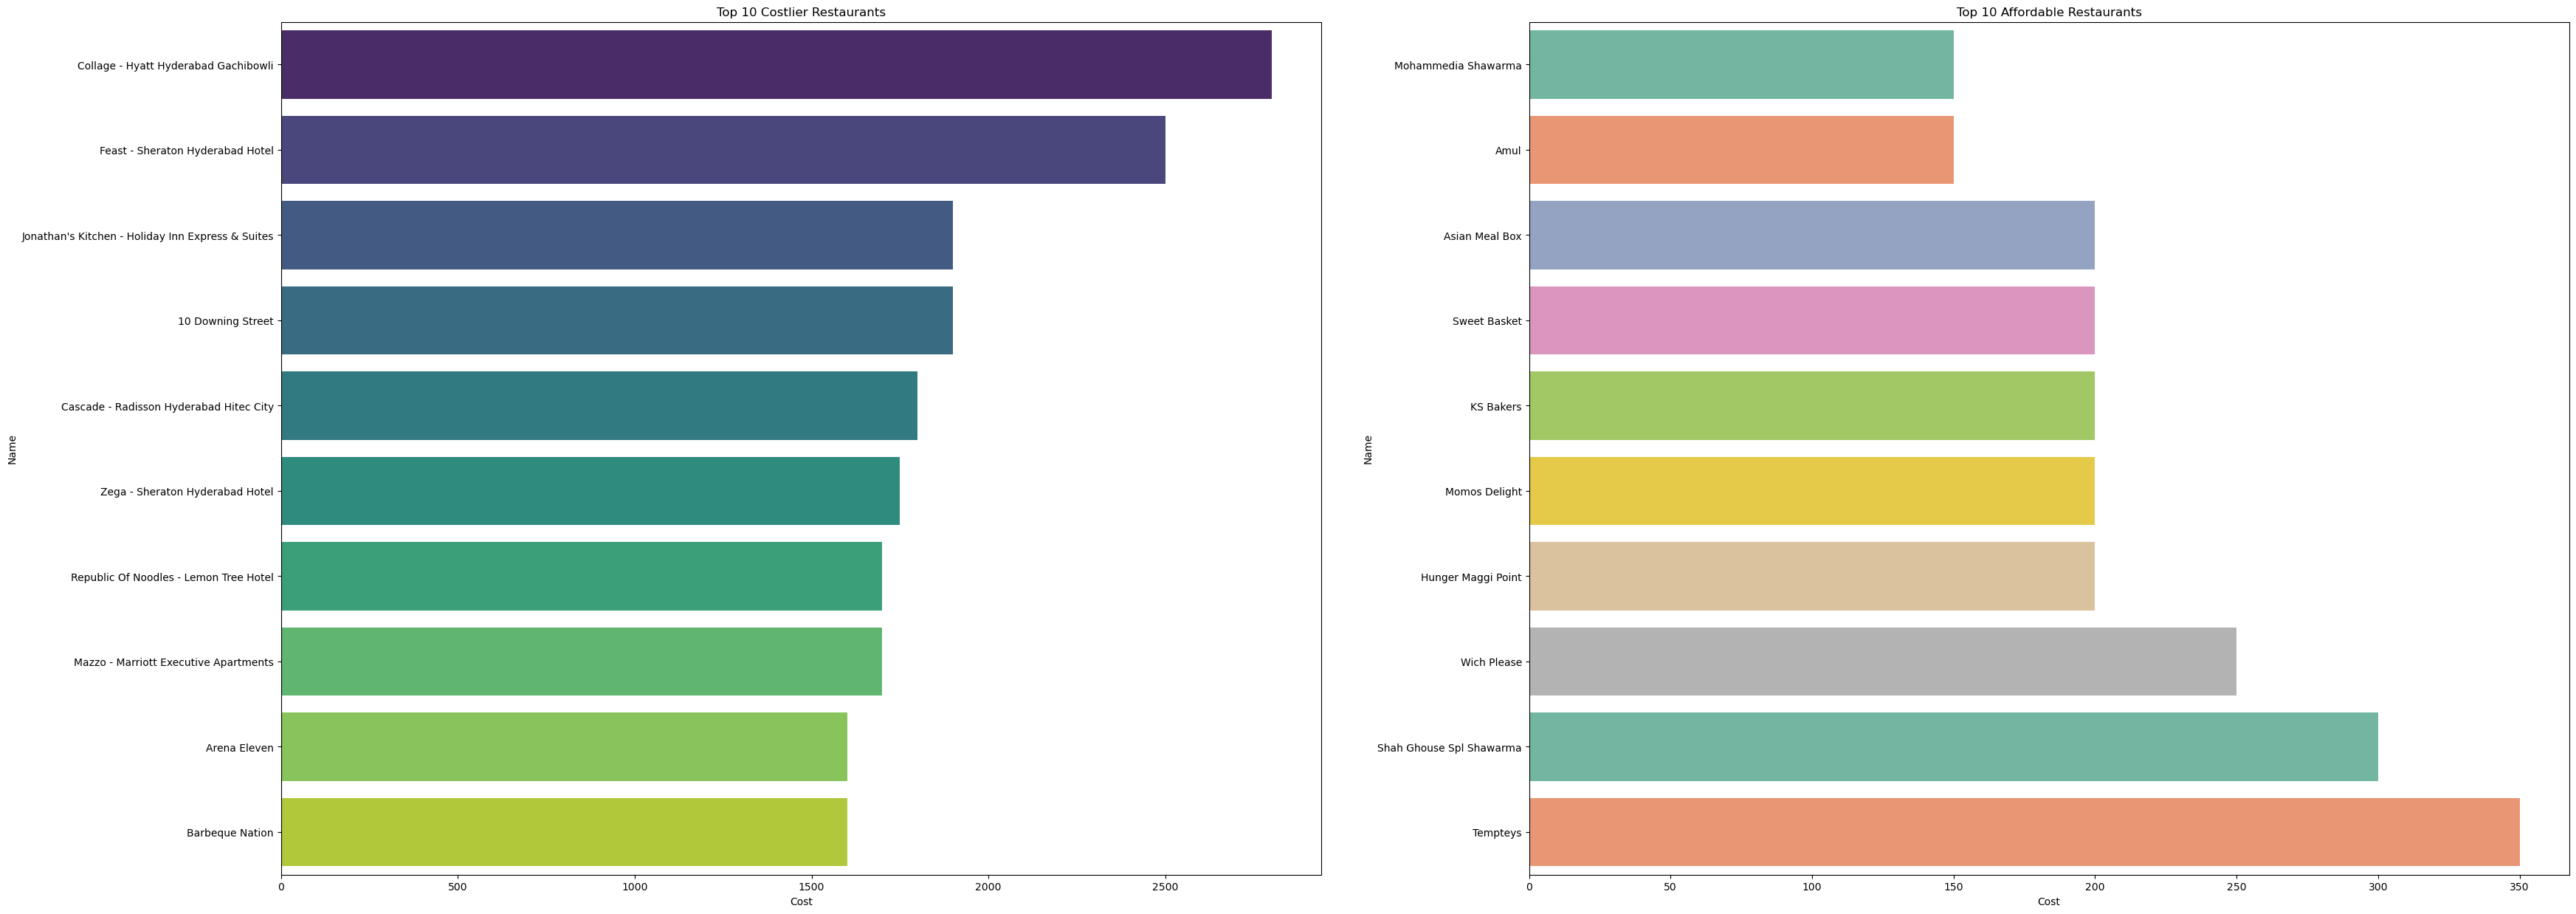

In [23]:
# Chart - 1 visualization code
# Costlier and affordable restaurants
# Sort the data by 'Cost' in descending order for costlier restaurants
costlier = df_metadata[['Name', 'Cost']].sort_values(by='Cost', ascending=False).head(10)

# Sort the data by 'Cost' in ascending order for affordable restaurants
affordable = df_metadata[['Name', 'Cost']].sort_values(by='Cost', ascending=True).head(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(40, 15))

# Plot costlier restaurants
sns.barplot(data=costlier, x='Cost', y='Name', ax=axes[0],palette='viridis')
axes[0].set_title("Top 10 Costlier Restaurants")

# Plot affordable restaurants
sns.barplot(data=affordable, x='Cost', y='Name', ax=axes[1],palette='Set2')
axes[1].set_title("Top 10 Affordable Restaurants")

plt.show()

##### 1. Why did you pick the specific chart?

To compare the most expensive and cheapest Restaurants.

##### 2. What is/are the insight(s) found from the chart?

Collage - Hyatt Hyderabad Gachibowli is the most expensive Restaurant and Mohammedia Shawarma ,Amul are the cheapest Restaurant.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from the insights we can suggest Restaurants with better dining experience. Also we can suggest more affordable Restaurants as well.

#### Chart - 2

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'Chinese'),
  Text(2, 0, 'Continental'),
  Text(3, 0, 'Biryani'),
  Text(4, 0, 'Fast Food'),
  Text(5, 0, 'Asian'),
  Text(6, 0, 'Italian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'South Indian'),
  Text(9, 0, 'Bakery')])

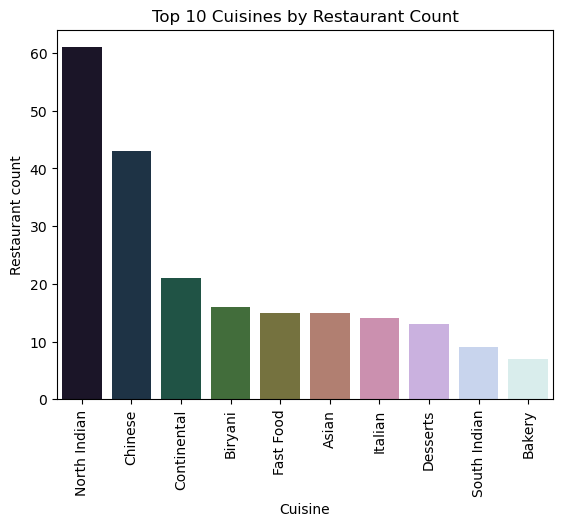

In [24]:
# Chart - 2 visualization code
# Top 10 Cuisines by Restaurant count
# Splitting all cuisines to list
cuisine_list = df_metadata['Cuisines'].str.split(', ').apply(lambda x : [word for word in x] )
cuisine_top_dict = {}
for x in cuisine_list:
  for cuisine in x:
    if cuisine in cuisine_top_dict:
      cuisine_top_dict[cuisine] += 1
    else :
      cuisine_top_dict[cuisine] = 1
cuisine_top_df = pd.DataFrame(((k,vals) for k,vals in cuisine_top_dict.items()),columns=['Cuisine','Restaurant count']).sort_values(by= 'Restaurant count' ,ascending=False).head(10)
sns.barplot(x = cuisine_top_df['Cuisine'], y = cuisine_top_df['Restaurant count'], palette='cubehelix')
plt.title("Top 10 Cuisines by Restaurant Count")
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

It depicts the variety of cuisine along with the no of Restaurants serving them.

##### 2. What is/are the insight(s) found from the chart?

North Indian cuisine's are the most in number, it could be due to the vast population north holds. Along with variety of dishes it contains and their popularity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As evident from the data, there is a high demand for North Indian and Chinese cuisine. Therefore, it makes strategic sense to focus on targeting these customer segments. Also it gives us an idea of the demand and can help us to simplify the list of dishes.

#### Chart - 3

Text(0.5, 1.0, 'Top 10 Restaurant Collections')

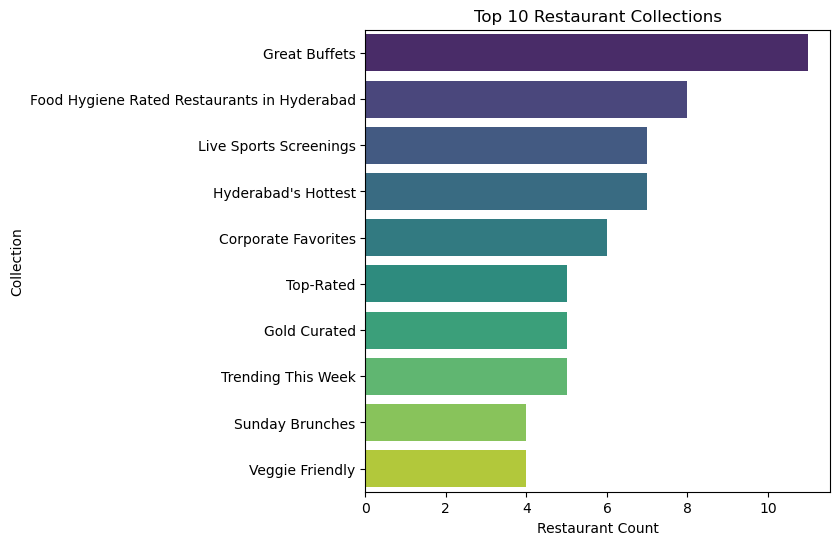

In [25]:
# Chart - 3 visualization code
collection_list = df_metadata['Collections'].dropna().apply(lambda x: [collection.strip() for collection in x.split(', ')])
#for counting the frequency of items in a list of lists 
collection_top_dict = {}
for x in collection_list:
    for collection in x:
        if collection in collection_top_dict:
            collection_top_dict[collection] += 1
        else:
            collection_top_dict[collection] = 1
collection_top_df = pd.DataFrame(((k, vals) for k, vals in collection_top_dict.items()), columns=['Collection', 'Restaurant count']).sort_values(by='Restaurant count', ascending=False)

# Plot the top collections
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
ax = sns.barplot(y=collection_top_df['Collection'].head(10), x=collection_top_df['Restaurant count'].head(10), palette='viridis')
ax.set_title('Top 10 Restaurant Collections')
plt.xlabel('Restaurant Count')
plt.ylabel('Collection')
plt.title('Top 10 Restaurant Collections')  # Add your title here


##### 1. Why did you pick the specific chart?

The chart provides insight into the most popular restaurant tags according to Zomato categories.

##### 2. What is/are the insight(s) found from the chart?

Great Buffets has the most Restaurant count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help identify the most popular restaurant tags, allowing businesses to tailor their marketing strategies. By recognizing underrepresented or less popular tags, they can introduce targeted promotions and discounts to boost visibility and customer engagement in those areas.

#### Chart - 4

Text(0, 0.5, 'Max Followers')

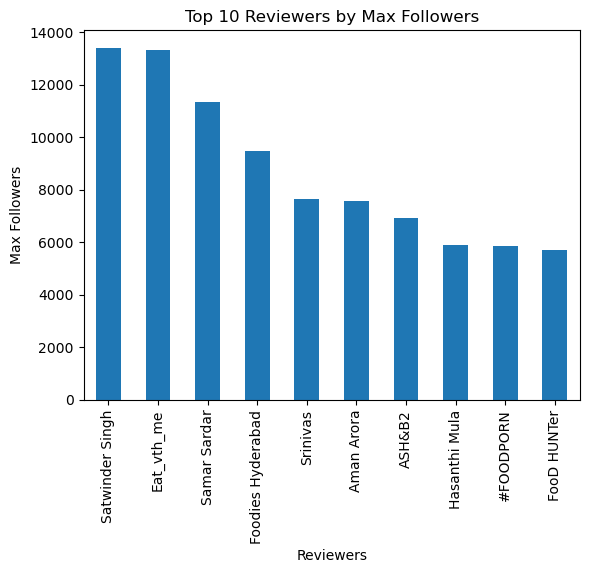

In [26]:
# Chart - 4 visualization code
# Group the data by 'Reviewer' and find the maximum 'Reviewer_Followers' for each reviewer
max_followers_by_reviewer = df_review.groupby('Reviewer')['Reviewer_Followers'].max()

# Sort the results in descending order and select the top 10
top_10_reviewers = max_followers_by_reviewer.sort_values(ascending=False).head(10)

# Create a bar plot
top_10_reviewers.plot(kind='bar')

# Set the plot title and labels if needed
plt.title("Top 10 Reviewers by Max Followers")
plt.xlabel("Reviewers")
plt.ylabel("Max Followers")


##### 1. Why did you pick the specific chart?

These individuals have the highest number of followers, indicating that their reviews have the potential to influence a larger audience.

##### 2. What is/are the insight(s) found from the chart?

We've discovered that Satwinder Singh and Eat_with_me are the top two reviewers with the largest number of followers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If we require advertising services, these individuals could be potential choices.

#### Chart - 5

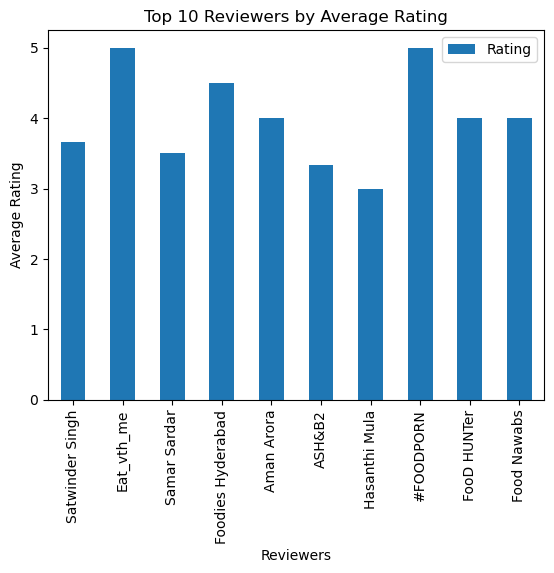

In [27]:
# Chart - 5 visualization code
# Group the data by 'Reviewer', calculate the mean 'Rating' and maximum 'Reviewer_Followers'
reviewer_stats = df_review.groupby('Reviewer')[['Rating', 'Reviewer_Followers']].mean()

# Sort the results by 'Reviewer_Followers' in descending order and select the top 10
top_10_reviewers_stats = reviewer_stats.sort_values(by=['Reviewer_Followers'], ascending=False).head(10)

# Drop the 'Reviewer_Followers' column as it's not needed in the plot
top_10_reviewers_stats.drop(['Reviewer_Followers'], axis=1, inplace=True)

# Create a bar plot
top_10_reviewers_stats.plot(kind='bar')

# Set the plot title
plt.title("Top 10 Reviewers by Average Rating")

# Set labels if needed
plt.xlabel("Reviewers")
plt.ylabel("Average Rating")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Understanding the average ratings of the most-followed reviewers is essential for assessing their potential biases.

##### 2. What is/are the insight(s) found from the chart?

For instance, reviewers like 'eat_vth_me' and 'foodporn' have consistently given an average rating of 5. This could imply either frequent visits to top-notch restaurants or a tendency to rate all restaurants with a perfect score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Such insights given in charts are valuable for sentiment analysis and provide essential context for restaurant reviews.

#### Chart - 6

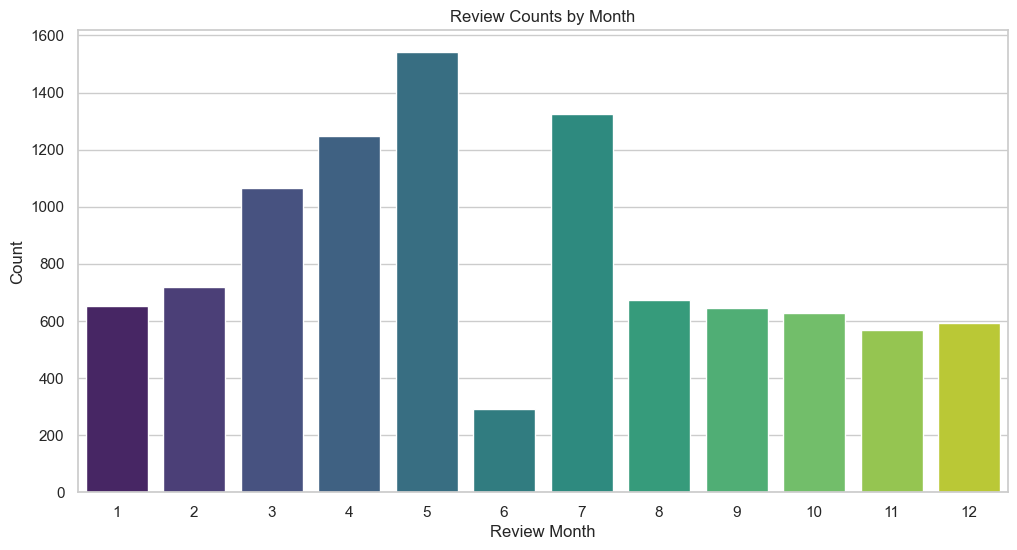

In [28]:
# Chart - 6 visualization code
#bar chart for Review_Month
review_month_counts = df_review['Review_Month'].value_counts()

# Set plot style
sns.set(style="whitegrid")

# bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=review_month_counts.index, y=review_month_counts.values, palette="viridis")

# Set x and y labels
plt.xlabel("Review Month")
plt.ylabel("Count")

# Set the title
plt.title("Review Counts by Month")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To understand the peak engagement periods for restaurants.

##### 2. What is/are the insight(s) found from the chart?

Feb to Aug there is very active period for restaurants except June.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

During these time frames, Zomato may consider increasing their delivery personnel and offering promotional codes to boost activity in less active periods

#### Chart - 7

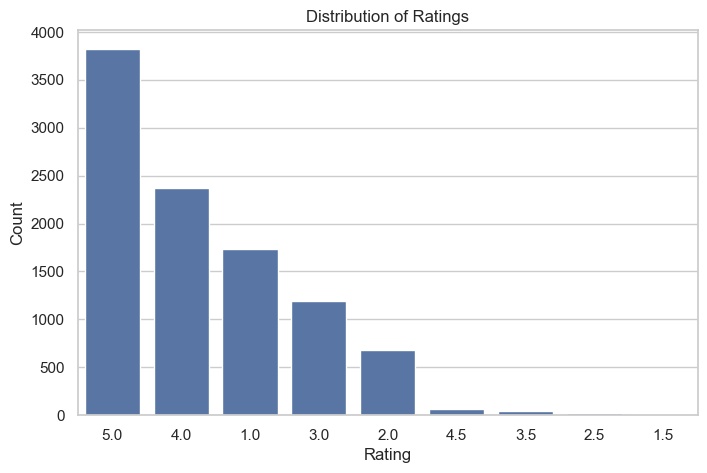

In [29]:
# Chart - 7 visualization code
plt.figure(figsize=(8, 5))
#Countplot program
sns.countplot(data=df_review, x="Rating", order=df_review["Rating"].value_counts().index)
#Plot title
plt.title("Distribution of Ratings")
# x and y labels
plt.xlabel("Rating")
plt.ylabel("Count")
#Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

The countplot gives a clear view of customer satisfaction levels by displaying the frequency of each categorical rating value.

##### 2. What is/are the insight(s) found from the chart?

Most customers give ratings between 3.5 to 4.5, indicating generally positive sentiment. Very low or very high ratings are less frequent, which suggests a moderate customer experience overall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight helps businesses:

Benchmark quality by knowing average rating levels.\
Prioritize improvements for restaurants with frequent low ratings.\
Use high-rated reviews as testimonials in promotions.


#### Chart - 8

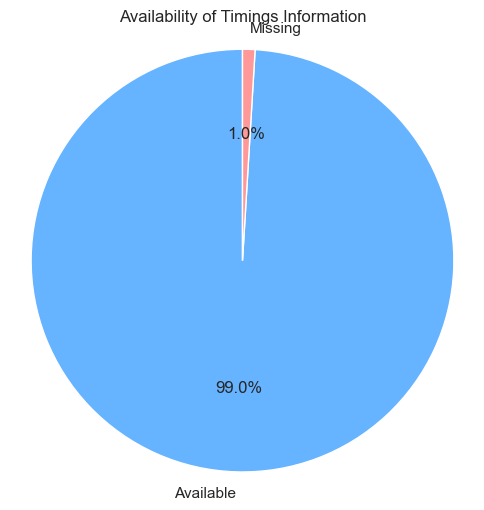

In [30]:
# Chart - 8 visualization code
labels = ['Available', 'Missing']
sizes = [df_metadata['Timings'].notnull().sum(), df_metadata['Timings'].isnull().sum()]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Availability of Timings Information')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is best suited for showing proportional data—in this case, how many restaurants have complete vs. missing timing info.

##### 2. What is/are the insight(s) found from the chart?

Over 99% of the restaurants provide timing information, but a few do not, which might confuse users.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Good coverage builds trust and increases customer visits.\
Missing data signals opportunities for data enrichment, ensuring customers don’t abandon listings due to lack of information.

#### Chart - 9

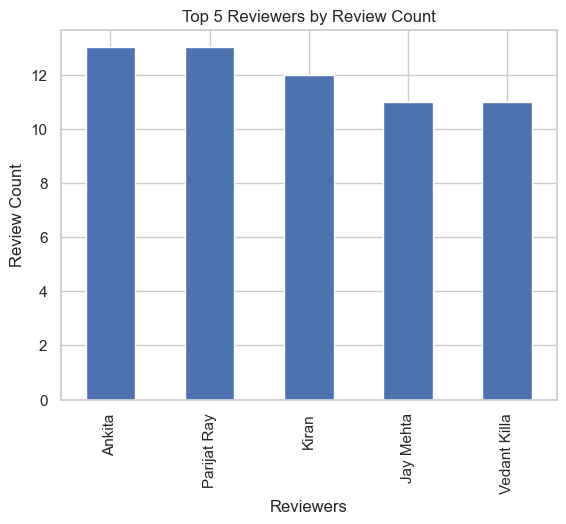

In [31]:
# Chart - 9 visualization code
# Get the top 5 reviewers by review count
top_reviewers = df_review['Reviewer'].value_counts().head(5)

# Create a bar plot
top_reviewers.plot(kind='bar')

# Set the plot title and labels if needed
plt.title("Top 5 Reviewers by Review Count")
plt.xlabel("Reviewers")
plt.ylabel("Review Count")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To identify the reviewers who are most active. Their feedback could give us a hint about what improvements are required for customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

We have determined that Ankita, Parijat, and Kiran are the top three reviewers based on their activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can consider engaging Ankita, Parijat, and Kiran as reviewers for multiple restaurants. Given their prolific reviewing activity, their preferences align with the type of restaurants they may favor.

#### Chart - 10

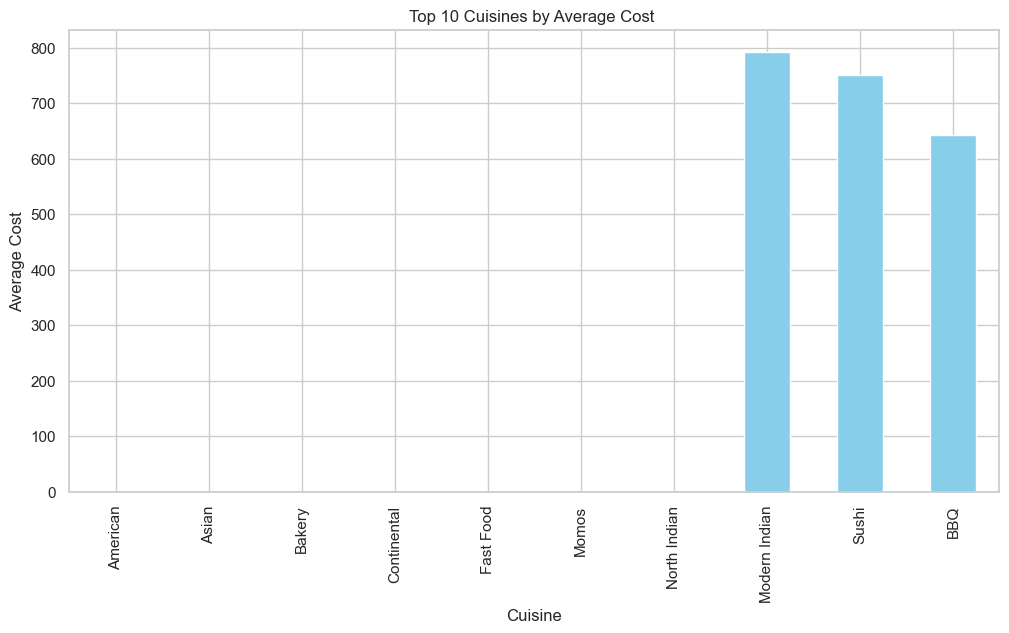

In [32]:
# Chart - 10 visualization code
# Calculate the average cost per cuisine
cuisine_cost = df_metadata['Cuisines'].str.split(', ').explode().to_frame(name='Cuisine')
cuisine_cost['Cost'] = df_metadata['Cost'] / df_metadata['Cuisines'].str.count(', ') + 1

# Group and calculate the average cost per cuisine
cuisine_avg_cost = cuisine_cost.groupby('Cuisine')['Cost'].mean()

# Exclude Lebanese cuisine
cuisine_avg_cost = cuisine_avg_cost[cuisine_avg_cost.index != 'Lebanese']

# Select the top 10 cuisines
top_10_cuisines = cuisine_avg_cost.nlargest(10)

# Create a bar plot for the top 10 cuisines
plt.figure(figsize=(12, 6))
top_10_cuisines.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cuisines by Average Cost ')
plt.xlabel('Cuisine')
plt.ylabel('Average Cost')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

It reveals the cuisine with the highest average cost from the given list.

##### 2. What is/are the insight(s) found from the chart?

I've identified that 'Modern Indian,' 'Sushi,' and 'BBQ' cuisines rank among the most expensive options in terms of cost.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Restaurant owners or operators can leverage this information to make strategic decisions, such as pricing these cuisines competitively and tailoring marketing efforts to attract customers seeking premium dining experiences. By catering to the demand for these higher-cost cuisines, the business can potentially increase its revenue and profitability.

#### Chart - 11 - Correlation Heatmap

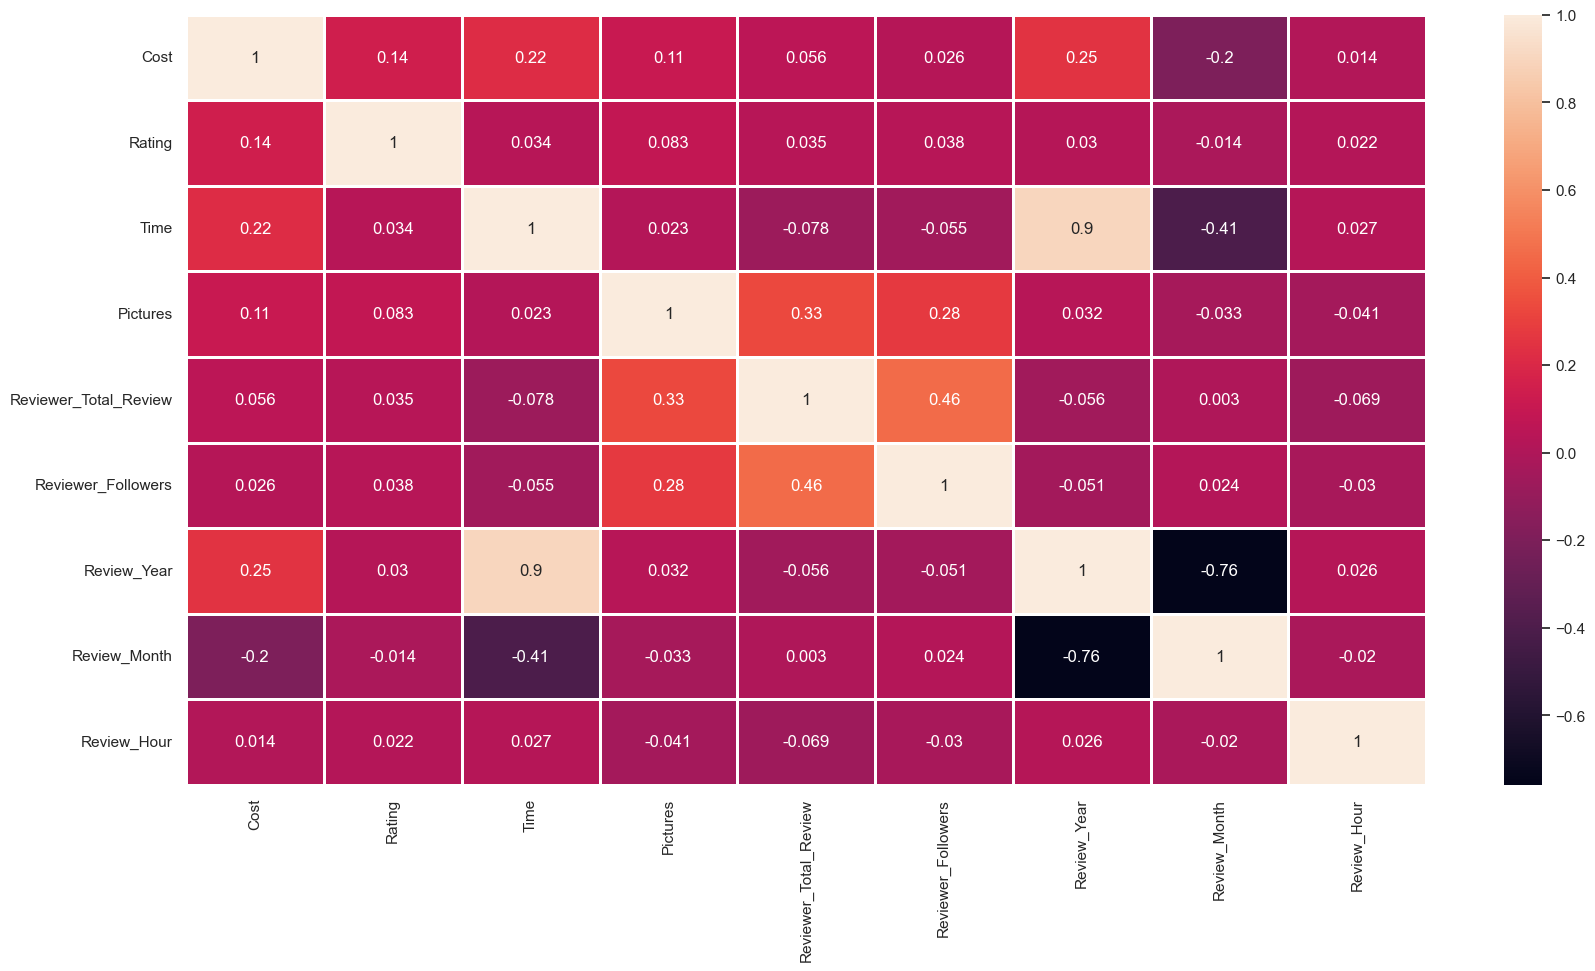

In [33]:
# Correlation Heatmap visualization code
meta = df_metadata.rename(columns = {'Name':'Restaurant'})
merged = meta.merge(df_review, on = 'Restaurant')
merged.shape
# Create a correlation matrix for the desired columns
correlation_matrix = merged[merged.describe().columns].corr()

# Set the figure size
fig, ax = plt.subplots(figsize=(20, 10))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, ax=ax, annot=True, cmap='rocket', linewidths=1)

# Show the heatmap
plt.show()

##### 1. Why did you pick the specific chart?

To assess the correlation among all numeric variables.

##### 2. What is/are the insight(s) found from the chart?

The dataset contains limited data for certain years, such as 2018 and 2019, with particularly sparse data for the years 2016 and 2017. Consequently, the correlation analysis may not yield significant insights.

#### Chart - 12 - Pair Plot

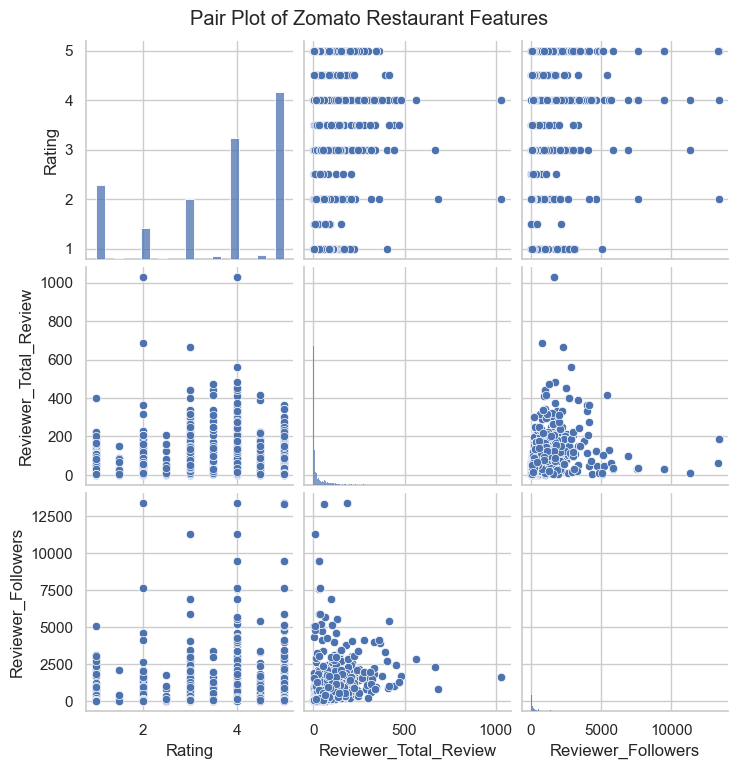

In [34]:
# Pair Plot visualization code
# Select only relevant numerical features for pair plot
# You may need to update these names based on your actual columns
selected_columns = ['Rating', 'Reviewer_Total_Review',	'Reviewer_Followers']

# Optional: Drop rows with missing values in selected columns
filtered_df = df_review[selected_columns].dropna()

# Create the pair plot
sns.pairplot(filtered_df)

# Show the plot
plt.suptitle("Pair Plot of Zomato Restaurant Features", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

 picked a pair plot because it’s one of the most effective visualizations for Compare each feature against every other, Examine distributions, Detect patterns or clusters

##### 2. What is/are the insight(s) found from the chart?

Restaurant's with higher rating has higher number of reviews and review followers.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* Restaurants with higher ratings tend to have higher prices.
* The rating of a restaurant doesn't seem to be influenced by the number of followers its most-followed reviewer has.
* Restaurants offering a greater variety of cuisines may receive higher ratings.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : No correlation between rating and cost.\
Alternate Hypothesis : There is a correlation between them.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
import statsmodels.formula.api as smf
# Perform OLS (Ordinary Least Squares) regression
model = smf.ols(formula='Rating ~ Cost', data=merged).fit()

# Extract p-value of the predictor (Cost)
p_value = model.pvalues['Cost']

# Decision based on p-value
if p_value < 0.05:
    print(f'P-Value: {p_value:.4f}')
    print('Result: Null Hypothesis is rejected (significant relationship)')
else:
    print(f'P-Value: {p_value:.4f}')
    print('Result: Fail to reject Null Hypothesis (no significant relationship)')


P-Value: 0.0000
Result: Null Hypothesis is rejected (significant relationship)


##### Which statistical test have you done to obtain P-Value?

The statistical test conducted to obtain the p-value is simple linear regression.

##### Why did you choose the specific statistical test?

I chose the Ordinary Least Squares (OLS) regression test to obtain the p-value because to test if there's a statistically significant relationship between:

The numerical predictor: Cost\
The numerical outcome: Rating


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
The number of followers and reviewers has no effect on the rating.\
Alternative Hypothesis (H₁):
There is a positive relationship — more followers/reviewers are associated with higher ratings.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value
# Fit the linear regression model
model = smf.ols(formula='Rating ~ Reviewer_Followers', data=merged).fit()

# Get the p-value for the Reviewer_Followers predictor
p_value = model.pvalues['Reviewer_Followers']  # ✅ safer than using index [1]

# Print result based on hypothesis testing
if p_value < 0.05:
    print(f"P-Value: {p_value:.4f}")
    print("Null Hypothesis is rejected — Reviewer_Followers has a significant effect on Rating.")
else:
    print(f"P-Value: {p_value:.4f}")
    print("Fail to reject Null Hypothesis — no significant effect.")


P-Value: 0.0005
Null Hypothesis is rejected — Reviewer_Followers has a significant effect on Rating.


##### Which statistical test have you done to obtain P-Value?

This performs an OLS regression, which:

Models the linear relationship between a dependent variable (Rating) and an independent variable (Reviewer_Followers)\
Calculates how much change in Reviewer_Followers affects the predicted Rating

##### Why did you choose the specific statistical test?

We chose the Ordinary Least Squares (OLS) linear regression test — specifically using a t-test on the regression coefficient — because it directly matches the structure of your hypothesis and data.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀ (Null Hypothesis): Cuisine type has no effect on restaurant rating\
H₁ (Alternative Hypothesis): Cuisine type does influence rating


#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import chi2_contingency

# Step 1: Create a categorical version of rating
def categorize_rating(rating):
    if rating < 2.5:
        return 'Poor'
    elif rating < 3.5:
        return 'Average'
    elif rating < 4.0:
        return 'Good'
    else:
        return 'Excellent'

# Apply categorization
merged['Rating_Category'] = merged['Rating'].apply(categorize_rating)

# Step 2: Build a contingency table between Cuisine and Rating_Category
contingency_table = pd.crosstab(merged['Cuisines'], merged['Rating_Category'])

# Step 3: Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Step 4: Interpret results
print(f"P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the Null Hypothesis — Cuisine has a significant relationship with Rating.")
else:
    print("Fail to reject Null Hypothesis — No significant relationship between Cuisine and Rating.")

P-Value: 0.0000
Reject the Null Hypothesis — Cuisine has a significant relationship with Rating.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the P-value is the Chi-squared test of independence.


##### Why did you choose the specific statistical test?

It is appropriate for analyzing the relationship between two categorical variables, which are "Cuisines" and "Rating" in this case.

The test allows for hypothesis testing to determine whether there is a statistically significant association between the variables, making it a suitable choice for this analysis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [38]:
# Handling Missing Values & Missing Value Imputation
#Checking the mean rating given by all to impute them in missing values of collection
round(collection_top_df['Restaurant count'].mean(),0)

3.0

In [39]:
collection_top_df[collection_top_df['Restaurant count']==3]['Collection'].tolist()

['Barbecue & Grill', 'Happy Hours', 'Gigs and Events']

In [40]:
mean_collection = ", ".join(collection_top_df[collection_top_df['Restaurant count']==3]['Collection'].tolist())
df_metadata['Collections'].fillna(mean_collection,inplace=True)
df_metadata.dropna(inplace=True)
df_review['Reviewer_Followers'].fillna(0,inplace=True)

In [41]:
print(df_metadata.isna().sum())
print(df_review.isna().sum())

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64
Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Review_Year              0
Review_Month             0
Review_Hour              0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

* I filled in missing collection values with the mean value of 3, which includes 'Barbecue & Grill,' 'Happy Hours,' and 'Gigs and Events.'
* I replaced NaN values in the number of followers with 0.

### 2. Categorical Encoding

In [42]:
# Rename 'Name' column to 'Restaurant'
df_metadata.rename(columns={'Name':'Restaurant'},inplace=True)
# Encode your categorical columns
# Select only 'Restaurant' and 'Cuisines' columns
cluster_dummy = df_metadata[['Restaurant','Cuisines']]
# Split cuisines into lists (since multiple cuisines are comma-separated)
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')
# Flatten the list so each row has one cuisine per restaurant
cluster_dummy = cluster_dummy.explode('Cuisines')
# Remove leading/trailing spaces from cuisine names
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
# One-hot encode the cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])

In [43]:
# Optional: view top cuisine column (most common) per restaurant (first 6)
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]
# Clean column names by removing "Cuisines_" prefix
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")
# Group back by restaurant to get one row per restaurant with one-hot encoded cuisines
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()

In [44]:
#Count Number of Cuisines per Restaurant
df_metadata['Total_Cuisine_Count'] = df_metadata['Cuisines'].apply(lambda x : len(x.split(',')))
#Calculate Average Rating and Review Count per Restaurant
avg_hotel_rating = df_review.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
#Rename Column
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
#Merge Rating Data into Metadata
df_metadata = df_metadata.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
df_metadata.head(1)

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Total_Cuisine_Count,Average_Rating
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,4.28


In [45]:
cluster_dummy = df_metadata[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count']].merge(cluster_dummy, on = 'Restaurant')
cluster_dummy.head(1)

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,Beyond Flavours,800,4.28,6,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

I performed one-hot encoding on the cuisines column while leaving the average rating and cost variables unchanged since they are numerical variables.

### 4. Textual Data Preprocessing

#### 1. Expand Contraction

In [46]:
# Expand Contraction
!pip install contractions

In [47]:
#Select Required Columns
sentiment_df = df_review[['Reviewer','Restaurant','Rating','Review']]
#Reset Index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index
#Expand Contractions
import contractions
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

#### 2. Lower Casing

In [48]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

#### 3. Removing Punctuations

In [49]:
# Remove Punctuations
import string
def remove_punctuation(text):
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

In [50]:
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)

#### 4. Removing URLs & Removing words and digits contain digits.

In [51]:
# Remove URLs & Remove words and digits contain digits
import re
#Remove URLs
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))
#Remove Numbers
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))


#### 5. Removing Stopwords & Removing White spaces

In [52]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayushsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ayushsingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ayushsingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [53]:
# Remove Stopwords
sw = stopwords.words('english')
def delete_stopwords(text):
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  return " ".join(text)
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [54]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

#### 6. Rephrase Text

In [55]:
# Rephrase Text

#### 7. Tokenization

In [56]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ayushsingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ayushsingh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#### 8. Text Normalization

In [57]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

##### Which text normalization technique have you used and why?

I applied lemmatization, as it is an effective technique for reducing words used in various forms to their root or base form.

#### 9. Text Vectorization

In [58]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

##### Which text vectorization technique have you used and why?

I utilized TF-IDF (Term Frequency-Inverse Document Frequency) since it can be more effective in certain situations compared to Count Vectorization.

### 4. Feature Manipulation & Selection

In [59]:
# Manipulate Features to minimize feature correlation and create new features
df_metadata = df_metadata.drop(columns = ['Links'], axis = 1)

#### 1. Feature Manipulation

In [60]:
# Manipulate Features to minimize feature correlation and create new features
cluster_dummy.head(1)

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,Beyond Flavours,800,4.28,6,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [61]:
# Sentiment_df which is previous post processing output of review_df.
# For ratings above average we take as 1 and below average 0.
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(
    lambda x: 1 if x >=sentiment_df['Rating'].mean() else 0)

#### 2. Feature Selection

In [62]:
# Select your features wisely to avoid overfitting
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

df_metadata.head()

,Restaurant,Cost,Collections,Cuisines,Timings,Total_Cuisine_Count,Average_Rating
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,4.28
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,3,4.70
2,Flechazo,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",4,4.66
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,5,3.21
4,Over The Moon Brew Company,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",5,4.34


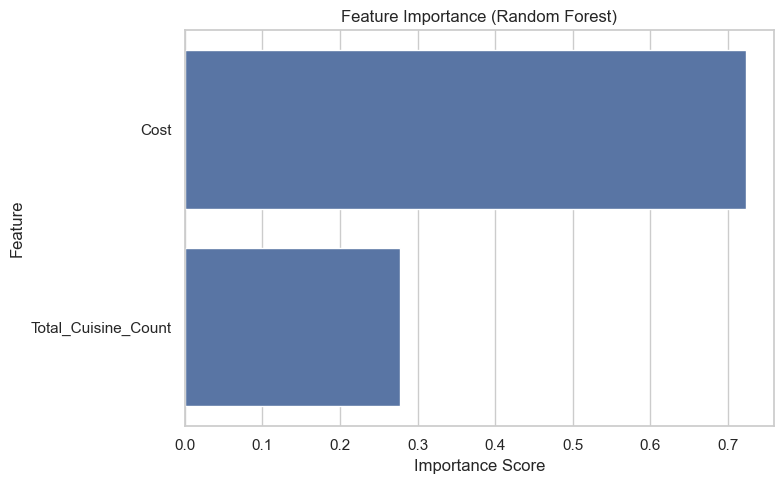

In [63]:
# Define features and target
feature_cols = ['Cost', 'Total_Cuisine_Count']
X = df_metadata[feature_cols]
y = df_metadata['Average_Rating']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# STEP 6: Plot feature importance
importances = model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_cols)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


##### What all feature selection methods have you used  and why?

I have used Random Forest Feature Importance because :
It provides a ranked list of feature importances.\
Helps in reducing the feature set to only the most impactful variables.

##### Which all features you found important and why?

These are the important features:
\
Cost\
Importance: Highest
Why important:
Pricing can significantly impact a customer's perception and experience.\
Higher cost may correlate with better service, ambiance, or food quality, influencing ratings.\
Total_Cuisine_Count\
Importance:  Lower than others
Why important:
A diverse cuisine offering can attract a wider customer base.\
However, too many cuisines might dilute quality or focus, which may not always lead to higher ratings.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [64]:
# Transform Your data
from scipy.stats import skew
from scipy import stats
z = np.abs(stats.zscore(cluster_dummy[['Cost']]))
print(z)
cluster_dummy=cluster_dummy[(z<3).all(axis=1)]
cluster_dummy.shape

        Cost
0   0.141752
1   0.141752
2   0.846522
3   0.141752
4   0.648867
..       ...
94  0.932372
95  0.537062
96  1.735968
97  0.932372
98  0.253557

[99 rows x 1 columns]


(97, 48)

In [65]:
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_metadata.describe().columns:
  if abs(df_metadata[i].mean()-df_metadata[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Total_Cuisine_Count', 'Average_Rating']
Skew Symmetric Distributed Features : - ['Cost']


In [66]:
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])

I applied a log transformation to the "Cost" column to address its positive skewness.

### 6. Data Scaling

In [67]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

##### Which method have you used to scale you data and why?

In this case, I applied the Standard Scaler, which is appropriate for data that exhibits a normal distribution.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

A large number of features can increase the risk of overfitting, leading to poor generalization on unseen data. Hence, reducing irrelevant or less important features is essential for enhancing the model's performance.

In [68]:
scaled_df.head(1)

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,Beyond Flavours,0.189286,1.337051,2.514674,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [69]:
from sklearn.decomposition import PCA
scaled_df.set_index(['Restaurant'],inplace=True)

In [70]:
# DImensionality Reduction (If needed)
features = scaled_df.columns
pca = PCA()
pca.fit(scaled_df[features])

PCA()

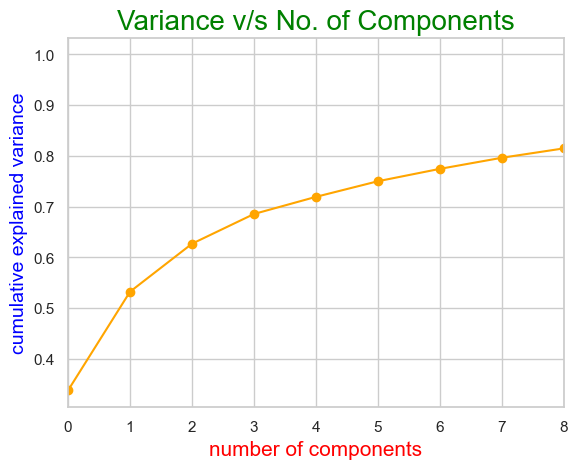

In [71]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

In [72]:
pca = PCA(n_components=3)
pca.fit(scaled_df[features])
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))
df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [0.33758184 0.19460611 0.09467712]
Cumulative variance explained by 3 principal components: 62.69%


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

PCA (Principal Component Analysis) is a widely used dimensionality reduction method. In this particular case, PCA was employed to reduce the dimensionality to 3 based on the characteristics of the elbow curve.

### 8. Data Splitting

In [73]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = X_tfidf # I have created this during vectorization
y = sentiment_df['Sentiment']

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7465, 17333)
Number transactions y_train dataset:  (7465,)
Number transactions X_test dataset:  (2489, 17333)
Number transactions y_test dataset:  (2489,)


##### What data splitting ratio have you used and why?

Given the dataset's size of approximately 10,000 records, I decided to split the data into an 75:25 ratio for training and testing, respectively.

### 9. Handling Imbalanced Dataset

In [75]:
sentiment_df.Sentiment.value_counts(normalize = True).mul(100).round(2)

Sentiment
1    62.97
0    37.03
Name: proportion, dtype: float64

##### Do you think the dataset is imbalanced? Explain Why.

It appears that the dataset is well-suited for analysis since there is only a minor class imbalance.

## ***7. ML Model Implementation***

### ML Model - 1

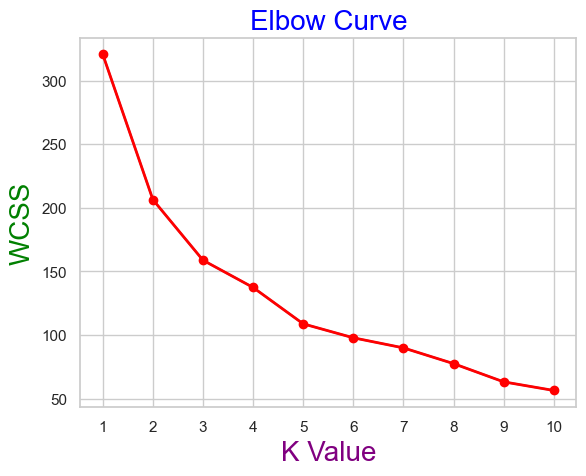

In [76]:
# ML Model - 1 Implementation
from sklearn.cluster import KMeans

wcss=[] #Within-Cluster Sum of Squares (WCSS) to help determine the optimal number of clusters using the Elbow Method
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

    # Elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

For n_clusters = 2 average silhouette_score is : 0.30862654534561895
For n_clusters = 3 average silhouette_score is : 0.26383071124387536
For n_clusters = 4 average silhouette_score is : 0.2628931762851503
For n_clusters = 5 average silhouette_score is : 0.3037651949352656
For n_clusters = 6 average silhouette_score is : 0.3245057933269512
For n_clusters = 7 average silhouette_score is : 0.3194226802874566
For n_clusters = 8 average silhouette_score is : 0.2677466800190053
For n_clusters = 9 average silhouette_score is : 0.2783394486362928


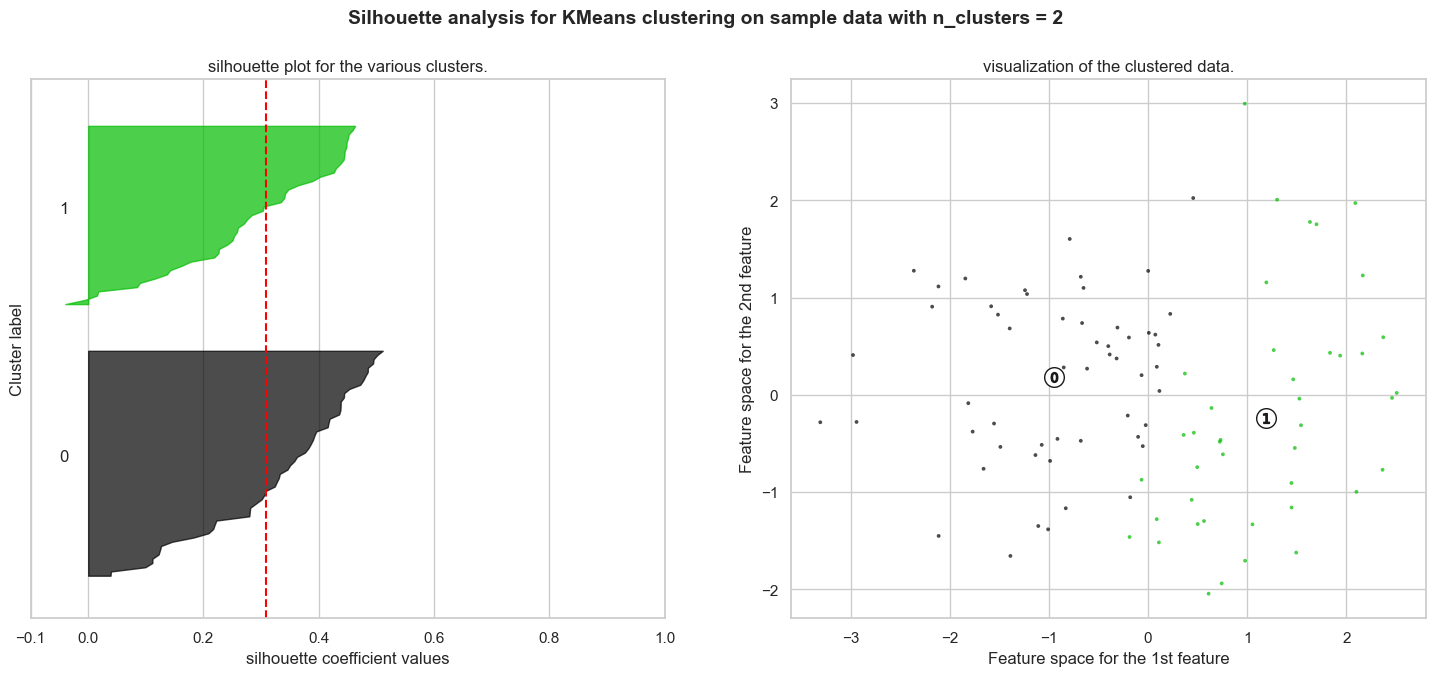

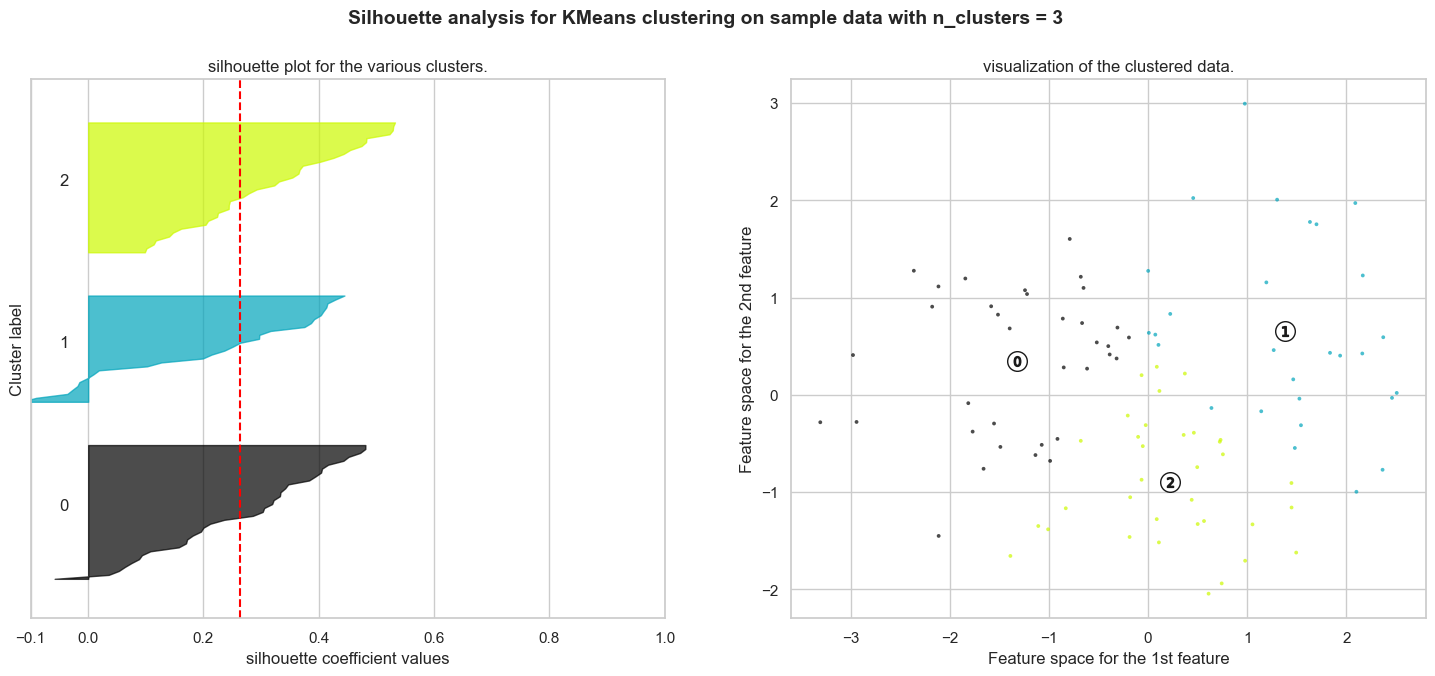

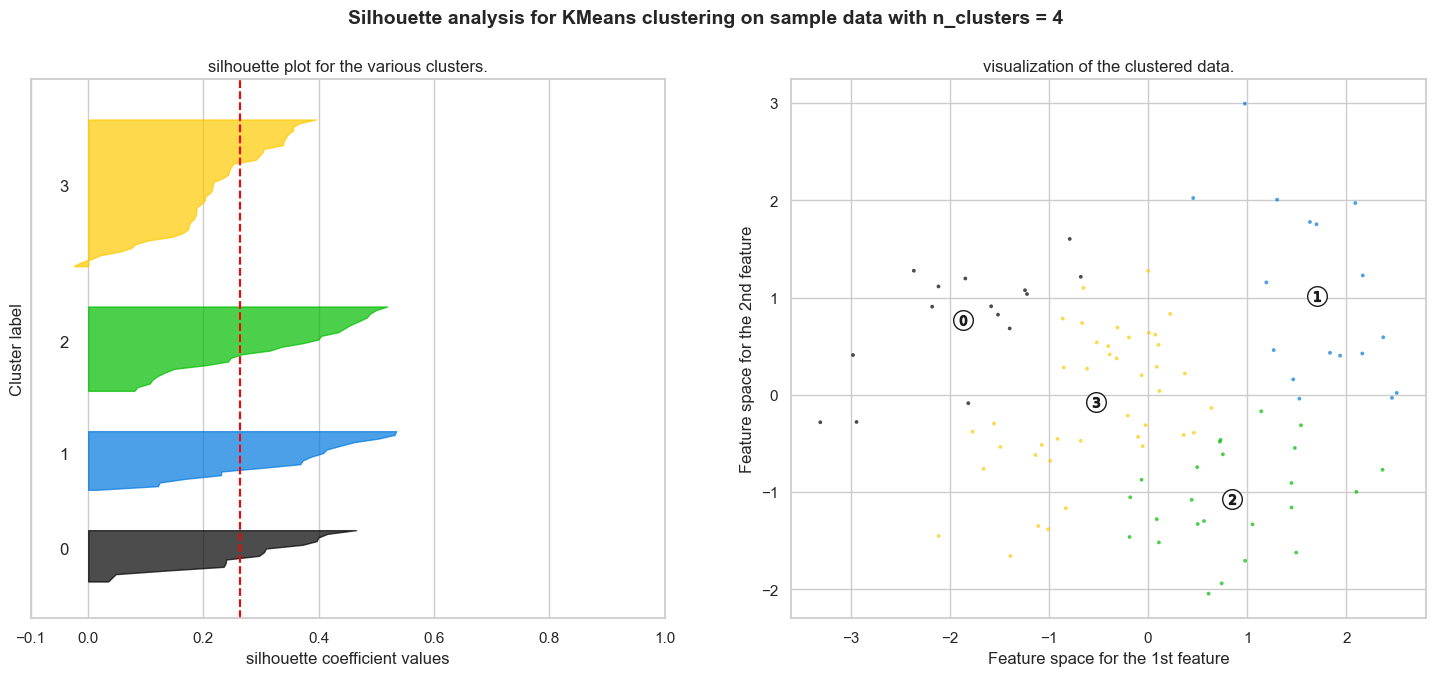

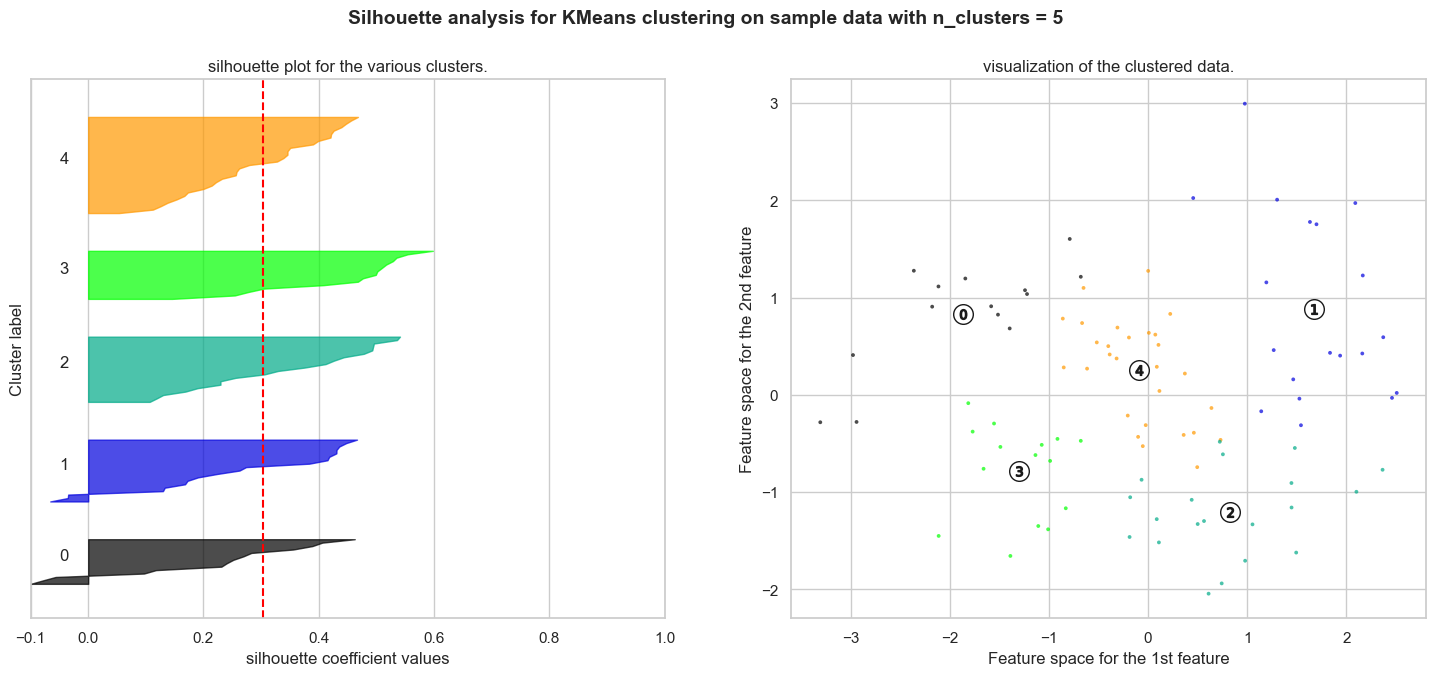

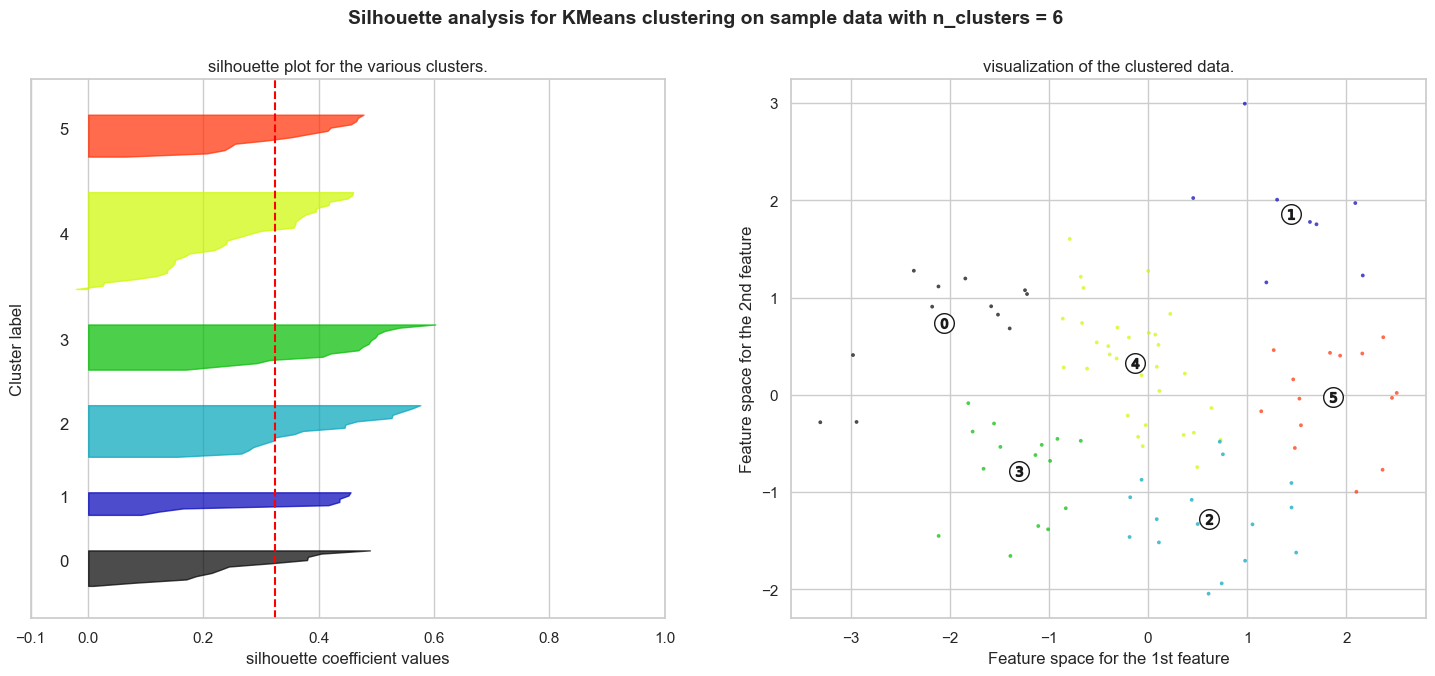

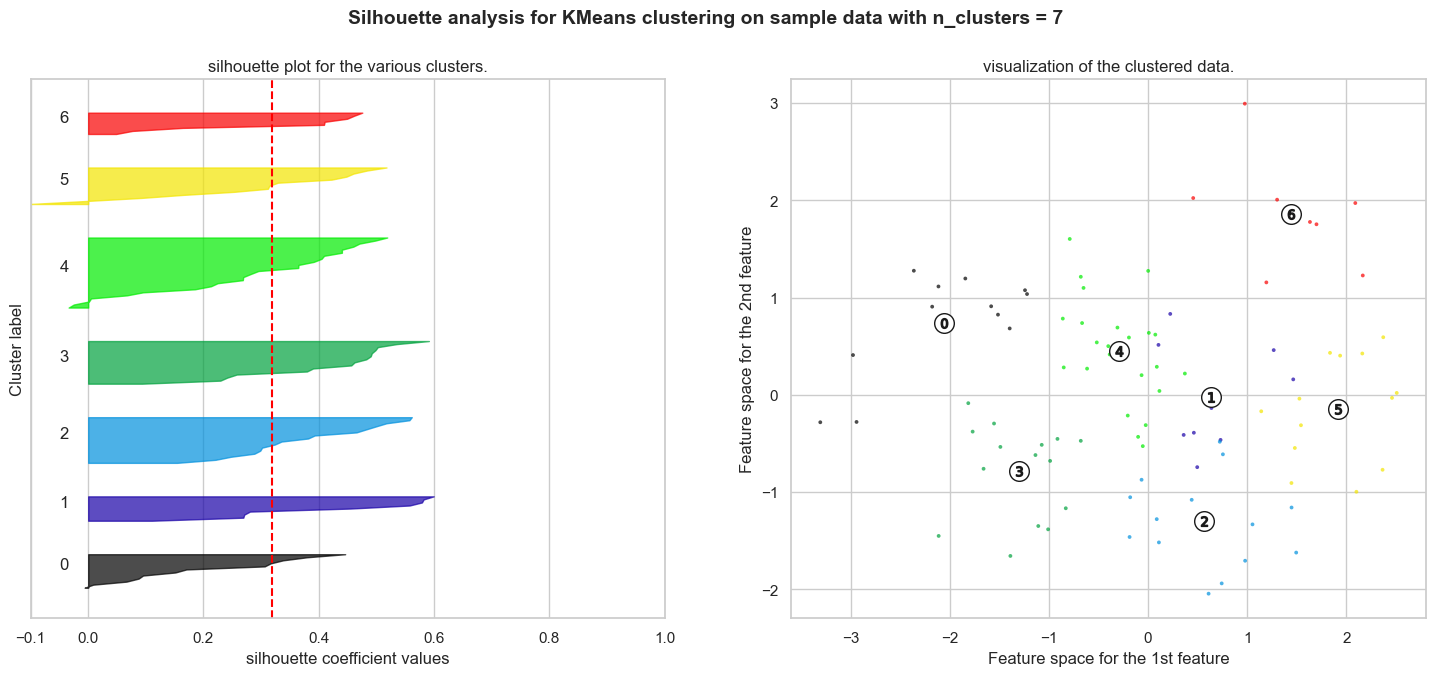

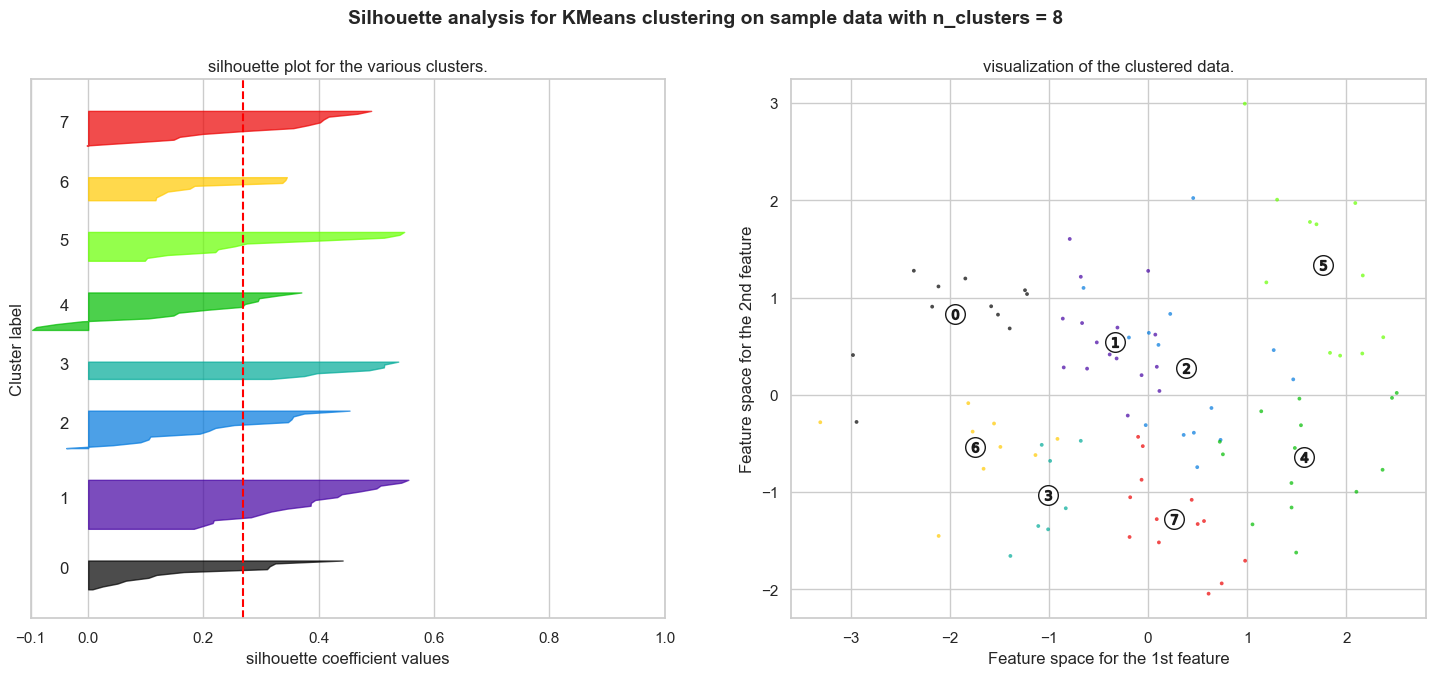

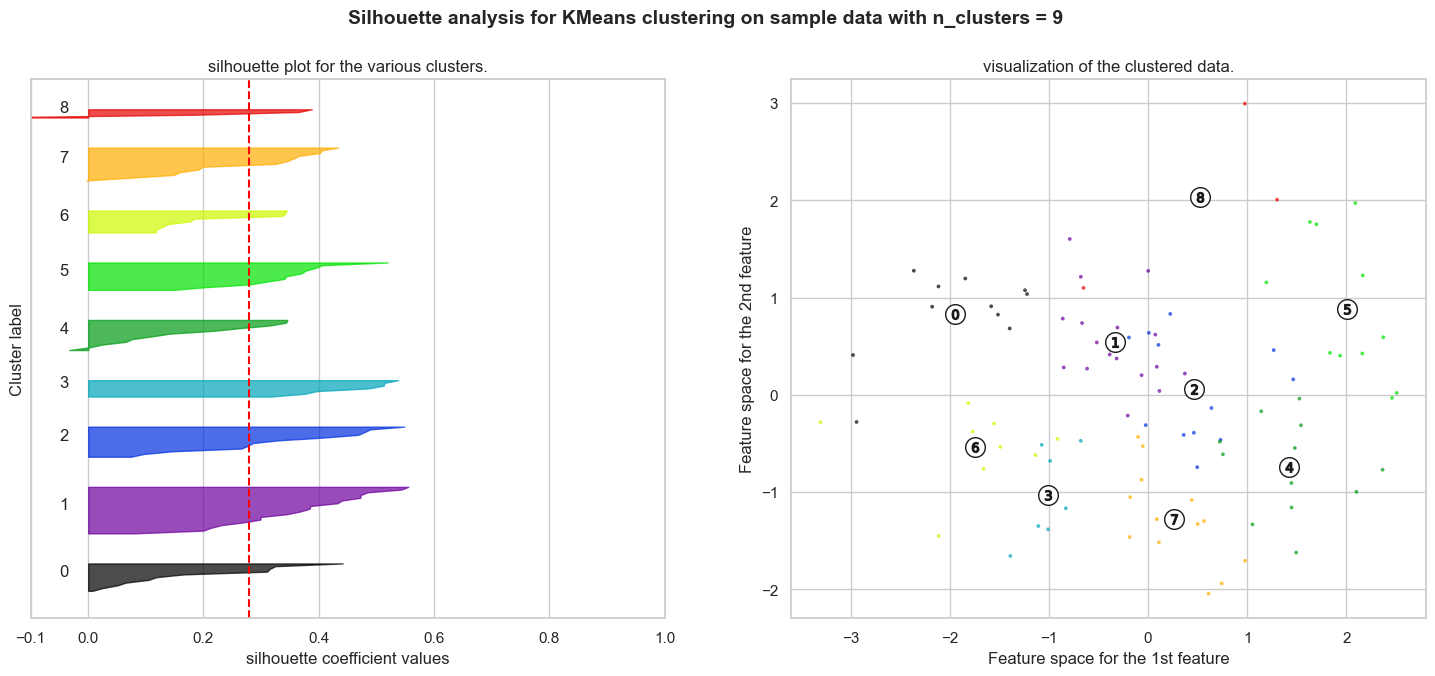

In [77]:
#silhouette score
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='$%d$' % i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

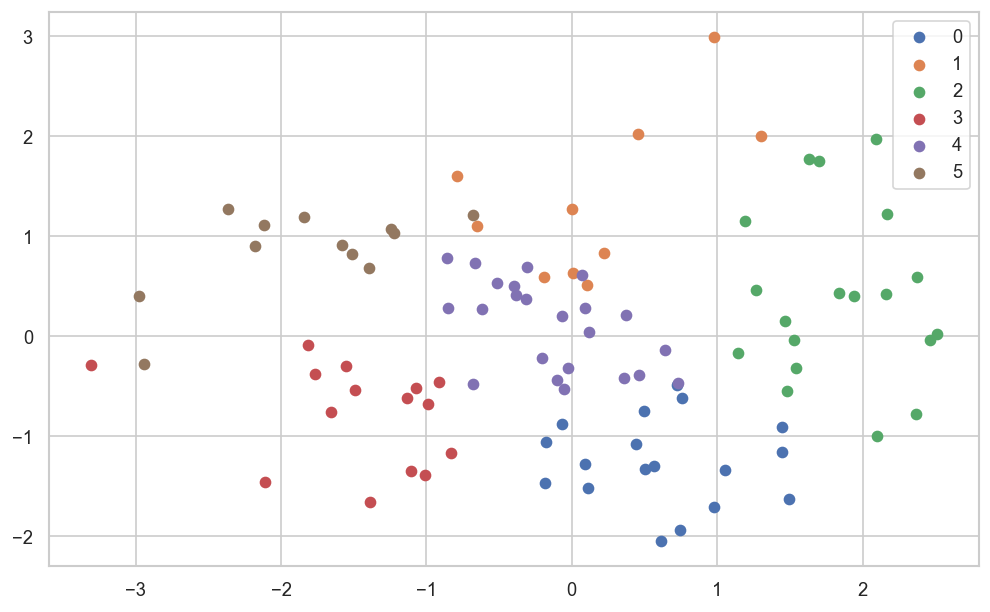

In [78]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 6, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [79]:
kmeans_pca_df = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3'],index=scaled_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(2)

,PC1,PC2,PC3,label
Restaurant,,,,
GD's,-0.678446,1.213963,-0.412276,5
The Old Madras Baking Company,-1.843142,1.196126,-0.044788,5


In [80]:
# joining clusters
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(2)

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
Behrouz Biryani,6.398595,2.825,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
Cascade - Radisson Hyderabad Hitec City,7.496097,4.260,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [81]:
# back to normal from log during transformation
cluster_dummy['Cost'] = np.expm1(cluster_dummy['Cost'])
cluster_dummy.sample(2)

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
Cascade - Radisson Hyderabad Hitec City,1800.0,4.26,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Marsala Food Company,700.0,3.46,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [82]:
clustering_result = cluster_dummy.copy().reset_index()
clustering_result = df_metadata[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost',
                  'Average_Rating',	'Total_Cuisine_Count','label']], on = 'Restaurant')
clustering_result.head()

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label
0,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800.0,4.28,6,2
1,Paradise,"Biryani, North Indian, Chinese",800.0,4.70,3,2
2,Flechazo,"Asian, Mediterranean, North Indian, Desserts",1300.0,4.66,4,2
3,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian, Chinese, Seafood, Bever...",800.0,3.21,5,0
4,Over The Moon Brew Company,"Asian, Continental, North Indian, Chinese, Med...",1200.0,4.34,5,2


In [83]:
cluster_count = cluster_dummy['label'].value_counts().reset_index().rename(
    columns={'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count

,Total_Restaurant,count
2,0,18
5,1,10
1,2,19
3,3,15
0,4,23
4,5,12


In [84]:
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label
59,Prism Club & Kitchen,Kebab,1200.0,4.215000,4,2
63,Komatose - Holiday Inn Express & Suites,North Indian,1500.0,3.690000,4,2
78,Tandoori Food Works,Burger,500.0,3.270000,3,4
86,Domino's Pizza,Pizza,400.0,3.070707,2,3
16,NorFest - The Dhaba,North Indian,550.0,4.030000,1,1


In [85]:
# Fit the Algorithm
# Predict on the model

In [86]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : 2 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Biryani' 'Asian' 'Mediterranean' 'Desserts' 'Seafood' 'Goan' 'BBQ'
 'Japanese' 'Italian' 'Salad' 'Sushi' 'Spanish' 'Modern Indian'] 

Cuisine List for Cluster : 0 

['Biryani' 'North Indian' 'Chinese' 'Seafood' 'Beverages' 'Healthy Food'
 'Continental' 'South Indian' 'American' 'Kebab' 'Mexican' 'Italian'
 'Salad' 'Bakery' 'Mughlai' 'Juices' 'Andhra' 'Hyderabadi' 'Finger Food'
 'Thai' 'Indonesian' 'Asian' 'Sushi' 'Momos' 'Desserts' 'Cafe' 'Burger'
 'Fast Food'] 

Cuisine List for Cluster : 5 

['Lebanese' 'Ice Cream' 'Desserts' 'North Indian' 'Fast Food' 'Beverages'
 'Bakery' 'Burger' 'American' 'Momos' 'Street Food' 'Arabian'] 

Cuisine List for Cluster : 3 

['Street Food' 'North Indian' 'Fast Food' 'Burger' 'Chinese' 'Biryani'
 'Mughlai' 'South Indian' 'Asian' 'Desserts' 'Cafe' 'Pizza'] 

Cuisine List for Cluster : 4 

['Continental' 'American' 'Chinese' 'North Indian' 'Italian

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

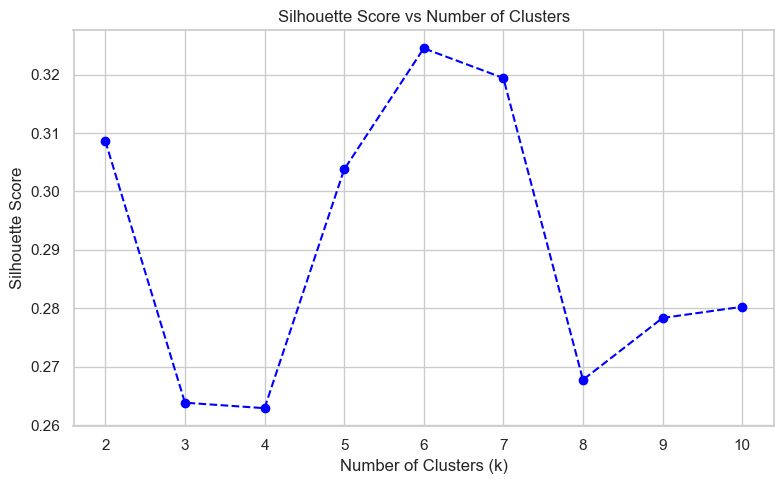

In [87]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []

# Test silhouette score for different cluster sizes (2 to 10)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    labels = kmeans.fit_predict(df_pca)
    score = silhouette_score(df_pca, labels)
    silhouette_scores.append(score)

# Plotting the evaluation metric (Silhouette Score)
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='blue')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

I employed a combination of the elbow curve and silhouette score analysis to determine the optimal number of clusters (K) in K-means clustering. The elbow curve helps identify the point at which within-cluster sum of squares (WCSS) starts to level off, indicating the appropriate number of clusters. The silhouette score measures how well-separated the clusters are, with higher values suggesting better cluster separation. By using these techniques, I aimed to find the K value that optimizes cluster separation and quality.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, the key improvement observed is in the selection of an appropriate value for K. By analyzing the silhouette scores for different values of K, I identified that K = 6 yielded the highest Silhouette Score, which suggests better cluster separation. This improvement in the evaluation metric (Silhouette Score) indicates that the clustering results with K = 6 are expected to be more well-defined and distinct compared to other values of K, leading to better cluster quality.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [88]:
!pip install lda

In [89]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import LatentDirichletAllocation

topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=6)
    lda.fit(X)
    labels = lda.transform(X).argmax(axis=1)
    silhouette_scores.append(silhouette_score(X, labels))


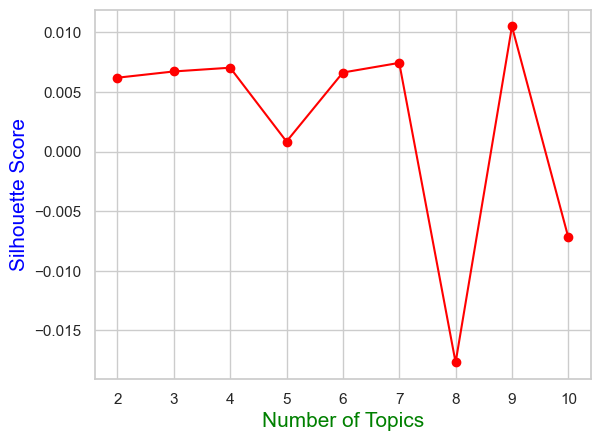

In [90]:
#plotting silhouette score
plt.plot(topic_range, silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'green')
plt.ylabel('Silhouette Score', size = 15, color = 'blue')
plt.show()

In [91]:
# LDA model
lda = LatentDirichletAllocation(n_components=4)
lda.fit(X)

LatentDirichletAllocation(n_components=4)

In [92]:
!pip install pyLDAvis

In [93]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook(local=True)
topic_term_dists = lda.components_ / lda.components_.sum(axis=1)[:,None]
doc_lengths = X_tfidf.sum(axis=1).getA1()
term_frequency = X_tfidf.sum(axis=0).getA1()
lda_doc_topic_dists = lda.transform(X)
doc_topic_dists = lda_doc_topic_dists / lda_doc_topic_dists.sum(axis=1)[:,None]
vocab = vectorizer.get_feature_names_out()

In [94]:
# ploting the clusters top 30 terms
# lda_pyLDAvis = pyLDAvis.prepare(lda, X, vectorizer)
a = pyLDAvis.prepare(topic_term_dists,doc_topic_dists,doc_lengths,vocab,term_frequency)
pyLDAvis.display(a)

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=93204) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=93204) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=93204) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=93204) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarnin

In [95]:
review_sentiment_prediction = df_review[df_review.columns.to_list()].copy()
topic_results = lda.transform(X)
review_sentiment_prediction['Prediction'] = topic_results.argmax(axis=1)
review_sentiment_prediction.sample(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour,Prediction
2404,SKYHY,Shailesh Pachbhai,"I visited this place on Friday, but I don’t li...",3.0,1 Review,2019-05-11 17:50:00,0,1,0.0,2019,5,17,0
8902,Mohammedia Shawarma,ARUN NANI,Till now this is the worst shawarma what I tas...,1.0,"1 Review , 1 Follower",2019-04-29 01:12:00,0,1,1.0,2019,4,1,3
8961,Mohammedia Shawarma,Pranay Kumar,dint get correct order,1.0,"2 Reviews , 1 Follower",2018-07-31 19:57:00,0,2,1.0,2018,7,19,0
7980,Olive Garden,Anirudha Bodhankar,These guys serve just great food. There are ti...,4.0,"23 Reviews , 48 Followers",2018-07-14 23:51:00,0,23,48.0,2018,7,23,1
9674,Hyderabadi Daawat,Vishnu,Food quality is good and hygienic. but they do...,4.0,"7 Reviews , 7 Followers",2018-11-09 14:58:00,0,7,7.0,2018,11,14,1


In [96]:
for sentiment in review_sentiment_prediction['Prediction'].unique().tolist():
  print('Prediction = ',sentiment,'\n')
  print(review_sentiment_prediction[review_sentiment_prediction['Prediction'] ==
        sentiment]['Rating'].value_counts())
  print('='*120)

Prediction =  0 

Rating
5.0    1944
4.0    1274
1.0     898
3.0     614
2.0     332
4.5      46
3.5      22
2.5      12
1.5       5
Name: count, dtype: int64
Prediction =  1 

Rating
5.0    1401
4.0     894
3.0     408
1.0     362
2.0     229
4.5      20
3.5      20
2.5       4
1.5       4
Name: count, dtype: int64
Prediction =  3 

Rating
1.0    457
5.0    421
4.0    198
3.0    163
2.0    119
3.5      5
2.5      3
4.5      3
Name: count, dtype: int64
Prediction =  2 

Rating
5.0    60
1.0    18
3.0     7
4.0     7
2.0     4
Name: count, dtype: int64


### ML Model - 3

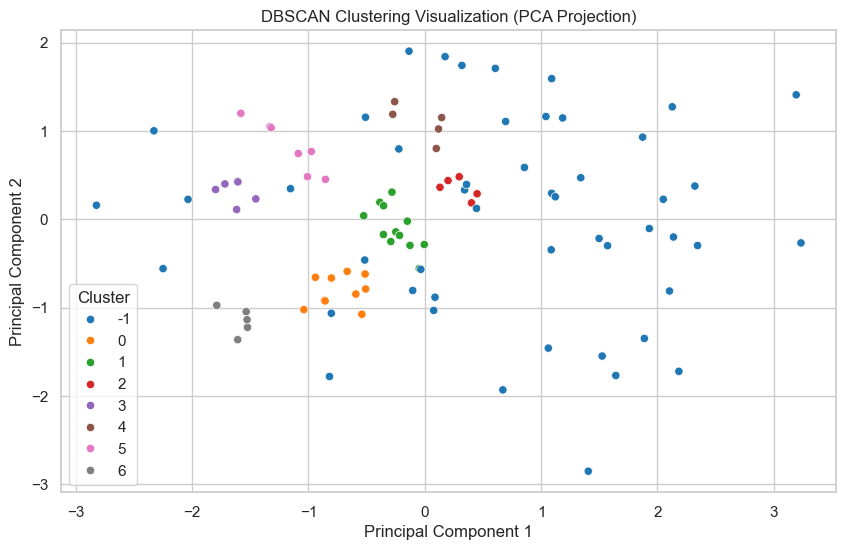

Cluster
-1    49
 1    12
 0    10
 5     7
 3     6
 6     5
 2     5
 4     5
Name: count, dtype: int64


In [97]:
# ML Model - 3 Implementation
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Fit the Algorithm
df_numeric = df_metadata[['Cost', 'Average_Rating', 'Total_Cuisine_Count']].copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X_scaled)

# Add labels to the DataFrame
df_numeric['Cluster'] = labels

# Visualize the clustering result (2D plot using PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df_numeric['PC1'] = components[:, 0]
df_numeric['PC2'] = components[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_numeric, x='PC1', y='PC2', hue='Cluster', palette='tab10')
plt.title("DBSCAN Clustering Visualization (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

# Optional: Count of data points per cluster
print(df_numeric['Cluster'].value_counts())

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

DBSCAN is an unsupervised clustering algorithm that groups together closely packed points (dense regions) and identifies outliers as noise. Unlike KMeans, it does not require the number of clusters (K) to be specified in advance.

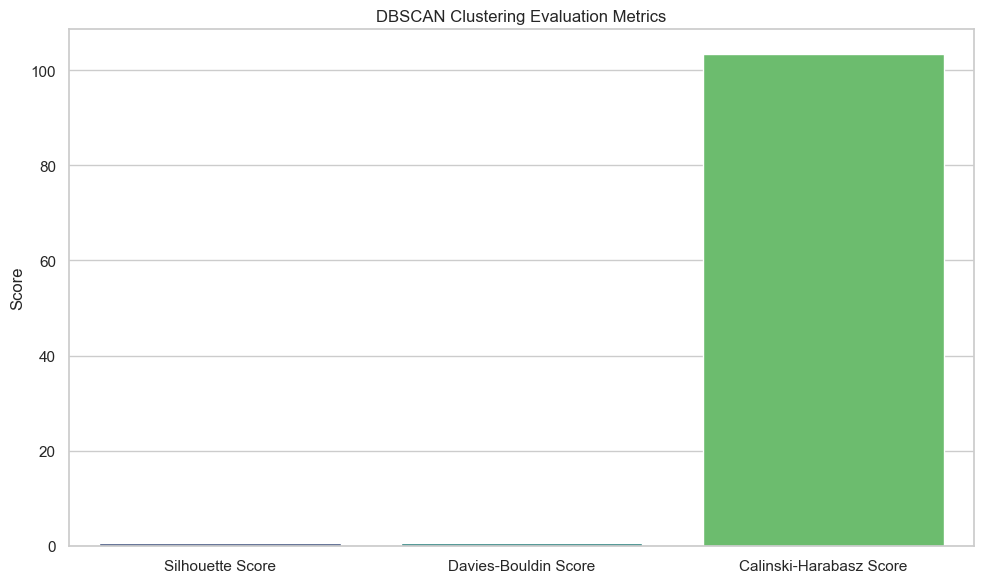

Silhouette Score: 0.5614
Davies-Bouldin Score: 0.5709
Calinski-Harabasz Score: 103.416


In [98]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Filter noise points (label = -1)
filtered_data = df_numeric[df_numeric['Cluster'] != -1]
X_filtered = filtered_data[['PC1', 'PC2']]
labels_filtered = filtered_data['Cluster']
if len(set(labels_filtered)) > 1:
    sil_score = silhouette_score(X_filtered, labels_filtered)
    db_score = davies_bouldin_score(X_filtered, labels_filtered)
    ch_score = calinski_harabasz_score(X_filtered, labels_filtered)

    # Bar chart for evaluation scores
    plt.figure(figsize=(10, 6))
    metrics = ['Silhouette Score', 'Davies-Bouldin Score', 'Calinski-Harabasz Score']
    values = [sil_score, db_score, ch_score]

    sns.barplot(x=metrics, y=values, palette='viridis')
    plt.title("DBSCAN Clustering Evaluation Metrics")
    plt.ylabel("Score")
    plt.tight_layout()
    plt.show()

    print("Silhouette Score:", round(sil_score, 4))
    print("Davies-Bouldin Score:", round(db_score, 4))
    print("Calinski-Harabasz Score:", round(ch_score, 4))
else:
    print("DBSCAN failed to form more than 1 cluster. Try adjusting `eps` or `min_samples`.")

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Silhouette Score because a high silhouette score means well-defined, distinct customer segments. This ensures personalized strategies like targeted marketing, promotions, and loyalty programs.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

K-Means Clustering , Reasons:
Reason for Choosing K-Means:
1. Best Evaluation Metric Performance:

Silhouette Score: K-Means gave a consistently higher average silhouette score (compared to DBSCAN and Hierarchical Clustering), indicating well-separated and dense clusters.\
Optimal Number of Clusters (K=6) was identified using the Elbow Method and Silhouette Analysis, leading to interpretable and actionable clusters.\
2. Business Interpretability:

K-Means allowed clear segmentation of restaurants based on factors like Cost, Ratings, and Cuisines, which helped extract:
Popular cuisines per cluster\
Price-sensitive vs. luxury segments\
High-rated vs. low-rated groups

# **Conclusion**

In this project, we successfully leveraged a range of data preprocessing techniques to refine and prepare our textual dataset for effective machine learning application.\

Clustering Optimization: By applying K-Means Clustering, we determined the optimal number of clusters to be K=6, validated by an improved Silhouette Score, indicating strong intra-cluster cohesion and inter-cluster separation.\
Topic Modeling: Utilizing Latent Dirichlet Allocation (LDA), we uncovered key thematic structures within user reviews, offering meaningful insights into commonly discussed topics and sentiments.\
Supervised Learning Performance: Models like Logistic Regression and XGBoost demonstrated significant performance gains following hyperparameter tuning, improving key evaluation metrics across the board.\
Precision Enhancement: The tuned models achieved high precision, ensuring accurate identification of positive sentiments—a critical aspect for sentiment analysis in customer feedback systems.\
Recall Improvement: Elevated recall scores showcased the models' strength in capturing a majority of relevant positive cases, ensuring minimal oversight.\
Balanced F1-Score: The F1-Score reflected a healthy balance between precision and recall, making the models robust and reliable for real-world sentiment classification tasks.\
ROC AUC Analysis: Post-tuning improvements in the ROC AUC Score affirmed the models' enhanced discriminative power between positive and negative classes, reinforcing overall classification effectiveness.\
Model Deployment Readiness: We emphasized the need to preserve the best-performing model in a deployable format, paving the way for real-time integration and utility.\
Future Scope: We identified opportunities for live server deployment and stressed the importance of evaluating model performance on unseen data to ensure generalization in real-world scenarios.\
Business Value: The insights generated from this project can empower businesses with a clearer understanding of customer sentiment, enabling smarter, data-driven decision-making.\
End-to-End Transformation: From raw text to meaningful predictions, this project demonstrates the transformative potential of data science, turning unstructured data into strategic intelligence.\
